In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


NameError: name 'get_sample_data' is not defined

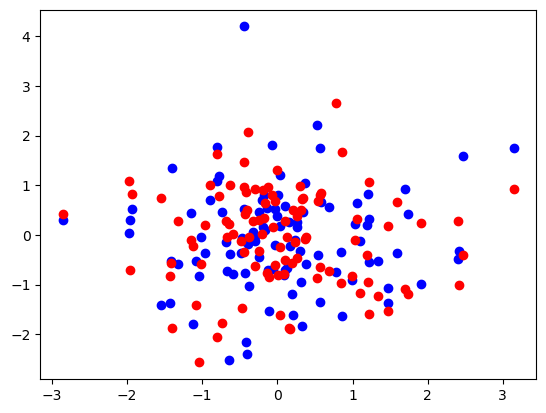

In [1]:
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import math
from tqdm import tqdm
from scipy.stats import norm
from scipy.optimize import minimize, basinhopping
# import optuna

# # !pip install matplotlib==3.1.3 work for me in Google Colab
import os

from matplotlib.transforms import TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.image import Bbox
from matplotlib.legend_handler import HandlerBase
from matplotlib.pyplot import imread as read_png

class ImageHandler(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize,
                       trans):

        # enlarge the image by these margins
        sx, sy = self.image_stretch

        # create a bounding box to house the image
        bb = Bbox.from_bounds(xdescent - sx,
                              ydescent - sy+10,
                              width + sx,
                              height + sy)

        tbb = TransformedBbox(bb, trans)
        image = BboxImage(tbb)
        image.set_data(self.image_data)

        self.update_prop(image, orig_handle, legend)

        return [image]

    def set_image(self, image_path, image_stretch=(0, 0)):
        if not os.path.exists(image_path):
            sample = get_sample_data("grace_hopper.png", asfileobj=False)
            self.image_data = read_png(sample)
        else:
            self.image_data = read_png(image_path)

        self.image_stretch = image_stretch

# random data
x4 = np.random.randn(100)
y4 = np.random.randn(100)
y2 = np.random.randn(100)


# plot two series of scatter data
s = plt.scatter(x4, y4, c='b')
s2 = plt.scatter(x4, y2, c='r')

# setup the handler instance for the scattered data
marker_handler = ImageHandler()
marker_handler.set_image("/content/drive/MyDrive/marker.PNG",
                         image_stretch=(0, 20)) # this is for grace hopper
red_marker_handler = ImageHandler()
red_marker_handler.set_image("/content/drive/MyDrive/marker_red.png",
                         image_stretch=(0, 20)) # this is for grace hopper

#example
# add the legend for the scattered data, mapping the
# scattered points to the custom handler
plt.legend([s, s2],
           ['Gaussian', 'Scatters 2'],
           handler_map={s: marker_handler, s2: marker_handler},
           labelspacing=2,
           frameon=False)

fig, ax = plt.subplots(nrows=2,ncols=2)

ax[1,1].plot(x4)
ax[1,1].legend()
ax[1,1].legend([ax[1,1]],
           ['Gaussian'],
           handler_map={ax[1,1]: marker_handler},
           labelspacing=2,
           frameon=False)


In [2]:
#These are necessary to avoid 0 and infinities from inv and det of large matracies
def chol_inv(A):
    L = np.linalg.cholesky(A)
    return np.linalg.inv(L).T @ np.linalg.inv(L)
def chol_det(A):
    L = np.linalg.cholesky(A)
    return np.prod(np.diag(L))

# Simple Regression Problem

[ 6.64286515  6.16585925  2.97429444  2.68040055 -0.18350599]


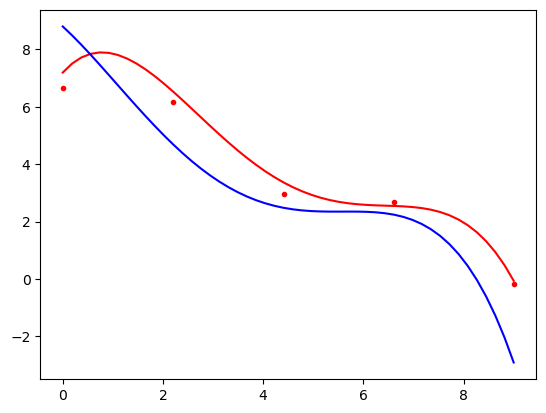

M


In [3]:
rng = np.random.default_rng(seed=10)
N = 50
exp_er = 0.5 #10
# def truef(x):
#     return x**2+1
def truef(x):
    a,b,c,d,e,f = -3, 2.4, -4, 0.8, 2.5, 2.6#-1.6, 1.8, -6, 0, 2.4, 2.5
    return -(e*(x-f)**4+d*(x-f)**3+c*(x-f)**2+b*(x-f)+a)

def likf(x):
    a,b,c,d,e,f = -2.8, 2.5, -4.1, 0.9, 1.8, 2.3#-1.6, 1.8, -6, 0, 2.4, 2.5
    return -(e*(x-f)**4+d*(x-f)**3+c*(x-f)**2+b*(x-f)+a)
# randgen = np.random.default_rng(seed=0)
x = np.linspace(1.25,3.75,N) #(1,10,10)
y = truef(x)
ylik = likf(x)
x = np.linspace(0,9,N)
# xd_indicies = [int(1*(N/100)),int(2*(N/100)),int(2.5*(N/100)),int(5*(N/100)),int(45*(N/100)),int(47*(N/100)),int(50*(N/100)),int(62*(N/100)),int(65*(N/100)),int(72*(N/100)),int(90*(N/100)),int(92*(N/100)),int(94*(N/100)),int(96*(N/100))]
xd_indicies = np.linspace(0,N-1,5).astype(int)
# xd_indicies = [0,9,25,29,31,49]

# xd_indicies = []
# while len(xd_indicies) < 200:
#     trial = int(randgen.normal(loc=50,scale=20,size=1))
#     if trial >= 100 or trial <= 0: a=1#do nothing
#     else: xd_indicies.append(trial)
# xd_indicies = [0,2,6,8,10,12,14,16,42,46,48,50, 72,76,78,80,85,90,95,99]

# xd_indicies = range(N)
xd = x[xd_indicies]
M = len(xd)
yd = rng.normal(loc=y[xd_indicies],scale=exp_er)
print(yd)
figSRP = plt.figure()
plt.plot(x,y,'r')
plt.plot(x,ylik,'b')
plt.plot(xd,yd,'r.')
plt.show()

prior_mean_vector = np.repeat(4,N)

print('M')

In [4]:
import seaborn as sn
import pandas as pd

xm = np.arange(10)
xm_indicies = np.linspace(0,N-1,10).astype(int)
ym = y[xm_indicies]

def Scale(x):
    return exp_er + 1*np.sin((np.pi/9)*x)

scale = Scale(np.arange(10))

def GetGausses(loc, scale, size):
    gausses = []
    for lo, sc in zip(loc,scale):
        gausses.append(np.random.normal(loc=lo, scale=sc, size=size))
    return gausses

gausses = GetGausses(ym,scale,size=1000000)

# sn.violinplot(data=gausses, color='blue', linewidth=0, split=True)
# plt.plot(x,y,'r')
# sn.violinplot(x=x[xd_indicies],y=y[xd_indicies], scale=np.repeat(exp_er, len(xd_indicies)), split=True)

ModuleNotFoundError: No module named 'seaborn'

# How a MVG can model a curve

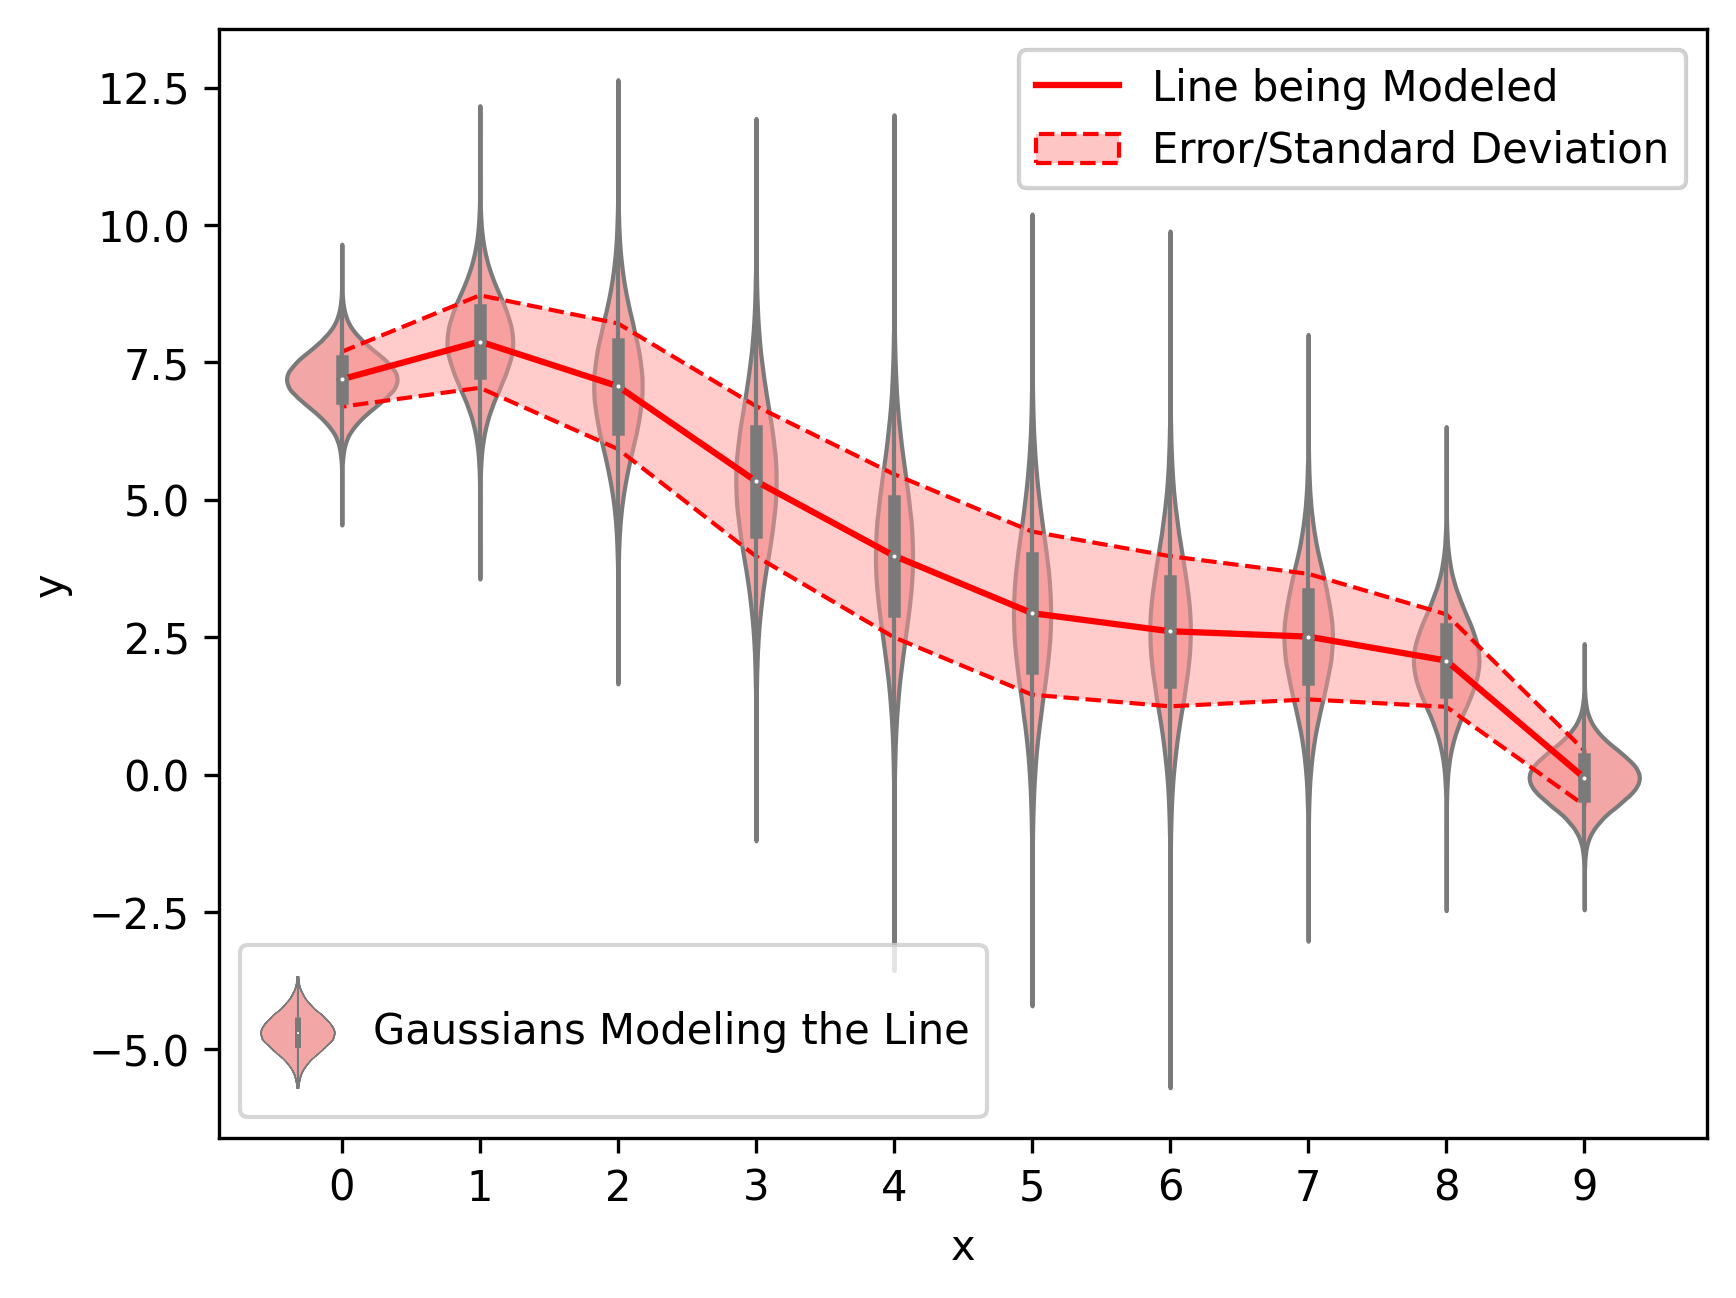

In [6]:
# class data:
#     def __init__(self):
#         return gausses, y[xd_indicies]
#     def get(self, x):
#         return x
figMVG = plt.figure(dpi=300)
sn.violinplot(data=gausses, color=(1,0.6,0.6,1), linewidth=1)
legend1 = plt.legend([ax[1,0]], ['\nGaussians Modeling the Line\n'], handler_map={ax[1,0]: red_marker_handler}, labelspacing=2,frameon=True, loc='lower left')
plt.xlabel('x')
plt.ylabel('y')
# plt.fill_between([0], [0], [0], color=(1,0.6,0.6,1), edgecolor=(0,0,0,0), label='Multiple Gaussians Modeling Line')
plt.plot(xm,ym,'r', label='Line being Modeled')
plt.fill_between(xm, ym-scale, ym+scale, color=(1,0.6,0.6,0.5), edgecolor=(1,0,0,1), linestyle='--', label='Error/Standard Deviation')


legend2 = plt.legend()
figMVG.add_artist(legend1)
figMVG.add_artist(legend2)
plt.show()

# Gaussian Processes 1

This way assumes the data and predictions come from a large multivariate distribution and then uses conditional theorums to find the posterior.



RESULTS   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 9.279856717636044
        x: [ 5.460e+00  2.734e+00]
      nit: 11
      jac: [ 4.768e-07  4.768e-07]
 hess_inv: [[ 4.402e+00  6.006e-01]
            [ 6.006e-01  5.632e-01]]
     nfev: 45
     njev: 15


Least Squares 0.15592077822999903


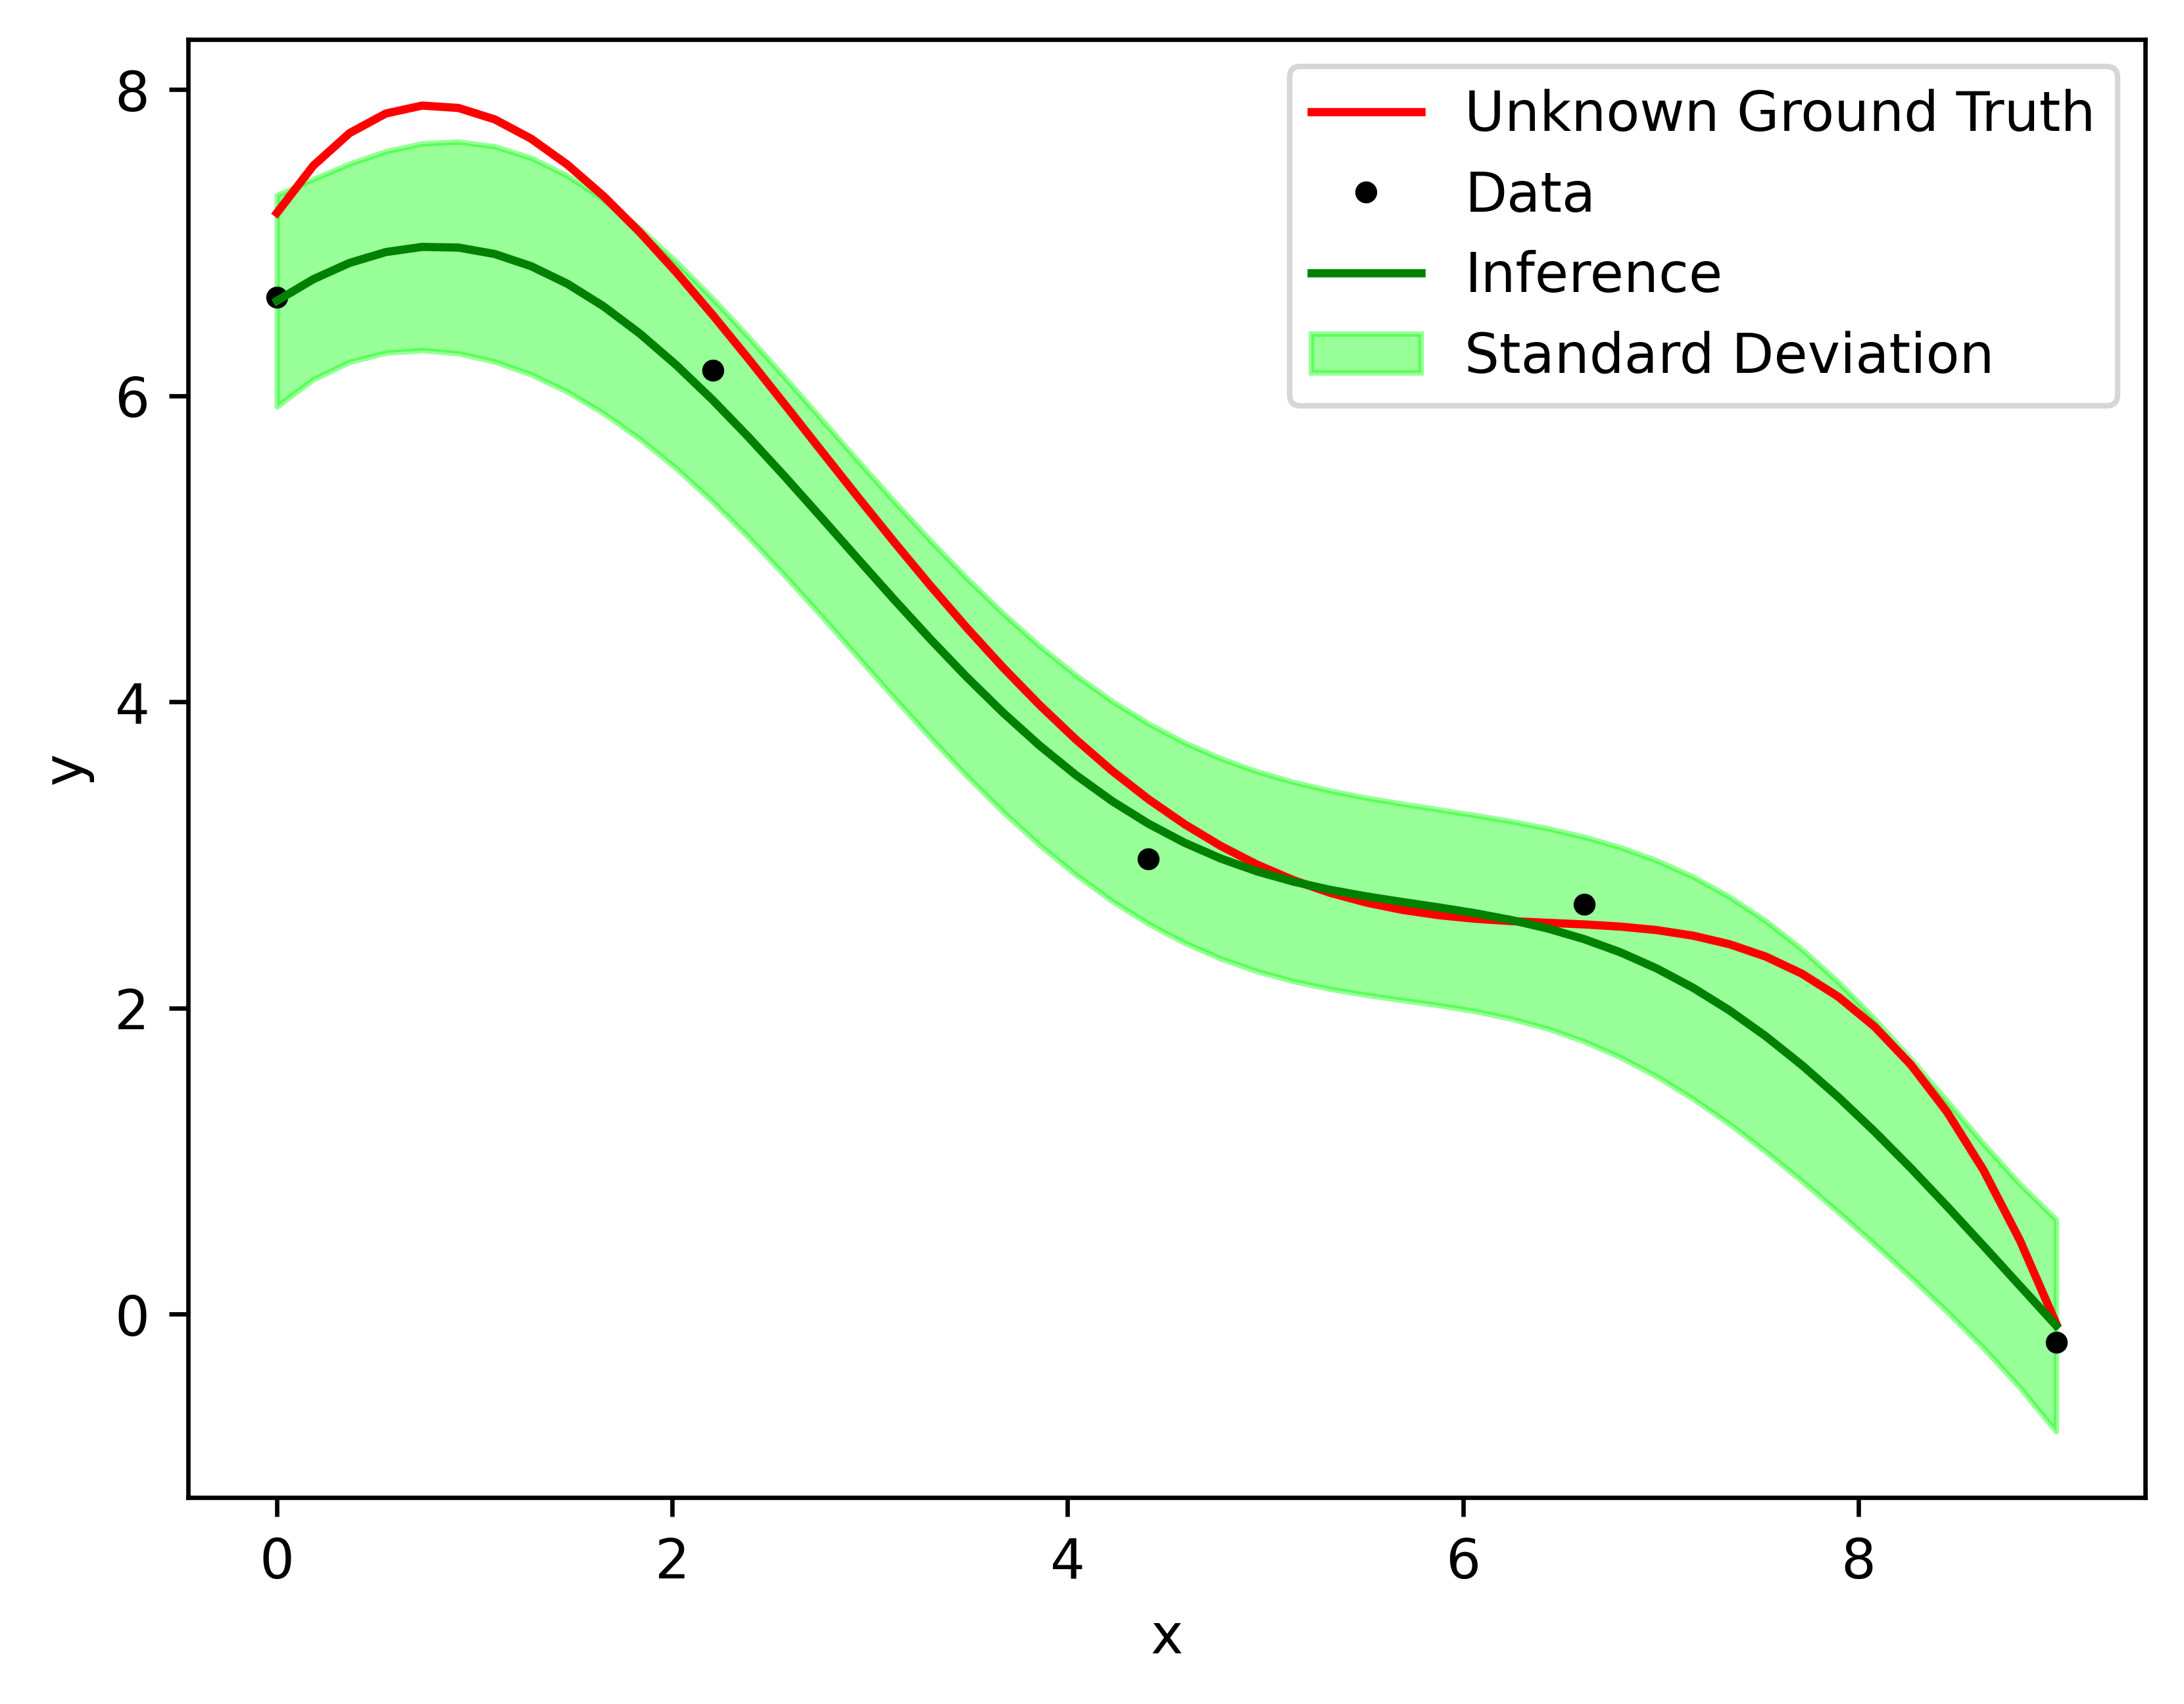

In [7]:
#KERNEL: exponential square kernel
def Kernel(x1,x2,params):
    amp = params[0]
    'How far should be between x1 and x2 for f(x1) to be uncorrelated with f(x2)'
    l = params[1]
    return amp**2 * np.exp(-((x1-x2)*(x1-x2))/(2*l**2))

#optimising kernel paramaters via marginal likelyhood
def MargLi(params):
    X1, X2 = np.meshgrid(xd,xd)
    K = Kernel(X1,X2,params)
    K[np.diag_indices_from(K)] += 1e-8
    cov_D = K + np.diag(np.repeat(exp_er,len(xd)))
    # K, R, cov_li = KRcov_li(params,exp_er)
    # invertable = cov_li+R@K@R.T
    # #add a small term onto diagonal of matricies to be inverted.
    # #this ensures it is positive definate and cholensky matrix can be computed
    # invertable[np.diag_indices_from(invertable)] += 1e-8

    return np.log(chol_det(cov_D)) + (yd.T@chol_inv(cov_D)@yd)

def Likelihood(params):
    X1, X2 = np.meshgrid(xd,xd)
    X1st, X2st = np.meshgrid(x,x)
    X1st2, X22 = np.meshgrid(x,xd)
    K = Kernel(X1,X2,params)

    ##Data Dist, has prior in it
    mu_D = prior_mean_vector
    errors = np.diag(np.repeat(exp_er,len(xd)))
    cov_D = K + errors**2

    Kstst = Kernel(X1st, X2st, params)
    Kst = Kernel(X22, X1st2, params)
    ##Predictions dist
    mu_yst = np.repeat(0,N)
    cov_yst = Kstst

    cov_post1 = Kstst - Kst.T @ chol_inv(cov_D) @ Kst
    mu_post1 = Kst.T @ chol_inv(cov_D) @ yd

    error_bars1 = np.sqrt(np.diagonal(cov_post1))

    # gauss = lambda x, mu, sigma: (1 / math.sqrt(2 * math.pi * sigma**2)) * math.exp(-((x - mu)**2 / (2 * sigma**2)))
    logprobs1 = np.log(norm.pdf(yd, loc=mu_post1[xd_indicies], scale=error_bars1[xd_indicies]))
    logprobs2 = np.log(norm.pdf(yd, loc=mu_post1[xd_indicies], scale=np.diag(errors)))
    alllogprobs = np.block([logprobs1,logprobs2])
    logli = -np.sum(alllogprobs)
    return logli

def LeastSquare(params):
    X1, X2 = np.meshgrid(xd,xd)
    X1st, X2st = np.meshgrid(x,x)
    X1st2, X22 = np.meshgrid(x,xd)
    K = Kernel(X1,X2,params)

    ##Data Dist, has prior in it
    mu_D = prior_mean_vector
    errors = np.diag(np.repeat(exp_er,len(xd)))
    cov_D = K + errors

    Kstst = Kernel(X1st, X2st, params)
    Kst = Kernel(X22, X1st2, params)
    ##Predictions dist
    mu_yst = np.repeat(0,N)
    cov_yst = Kstst

    cov_post1 = Kstst - Kst.T @ chol_inv(cov_D) @ Kst
    mu_post1 = Kst.T @ chol_inv(cov_D) @ yd

    return np.sum((yd-mu_post1[xd_indicies])**2)

rand_amp = np.random.uniform(0,20)
rand_l = np.random.uniform(0,4)

# x0=[rand_amp,rand_l]
# x0=[12,0.125]
# x0 = [7.9349329 , 1.93825204]
# x0 = [7.93,1.938]
x0=[9.22070267, 2]#.97579064]
# print('Random Initial Parameters', x0)
# fun = Likelihood
# fun = LeastSquare
fun = MargLi
results = minimize(fun, x0=x0, tol=1e-6)
# # results = basinhopping(MargLi, x0=x0, niter=200)
print('\n\nRESULTS',results)
best_params = results.x

# l_trial = np.linspace(0.)

# best_params = x0

print('\n\nLeast Squares', LeastSquare(best_params))
# print('\n\nMargLi',MargLi(best_params))

X1, X2 = np.meshgrid(xd,xd)
X1st, X2st = np.meshgrid(x,x)
X1st2, X22 = np.meshgrid(x,xd)

# best_params=x0

K = Kernel(X1,X2,best_params)

##Data Dist, has prior in it
mu_D = prior_mean_vector
cov_D = K + np.diag(np.repeat(exp_er,len(xd)))

#add a small term onto diagonal of matricies to be inverted.
#this ensures it is positive definate and cholensky matrix can be computed
# K[np.diag_indices_from(K)] += 1e-8

Kstst = Kernel(X1st, X2st,best_params)
Kst = Kernel(X22, X1st2,best_params)

# print('Probably not good if 0. cov_D definetly cannot be 0 as it is inverted.')
# print('The Determinent of K is:', chol_det(K))
# print('The Determinent of Kst is:', chol_det(Kst))
# print('The Determinent of Kstst is:', chol_det(Kstst))
# print('The Determinent of cov_D is:', chol_det(cov_D))
##Predictions dist
mu_yst = np.repeat(0,N)
cov_yst = Kstst

cov_post1 = Kstst - Kst.T @ chol_inv(cov_D) @ Kst
mu_post1 = Kst.T @ chol_inv(cov_D) @ yd

error_bars1 = np.sqrt(np.diagonal(cov_post1))

figGPR1 = plt.figure(dpi=600)
# plt.title('GPR1')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'r', label='Unknown Ground Truth')
plt.plot(xd,yd,'.k', label='Data')
plt.plot(x,mu_post1,'g', label='Inference')
plt.fill_between(x,mu_post1-error_bars1,mu_post1+error_bars1, color=(0,1,0,0.4), label='Standard Deviation')
plt.legend()
plt.show()

#0.03646635231489926
#0.35647687102984404

# Representing the Process


[0.         2.20408163 4.40816327 6.6122449  9.        ]


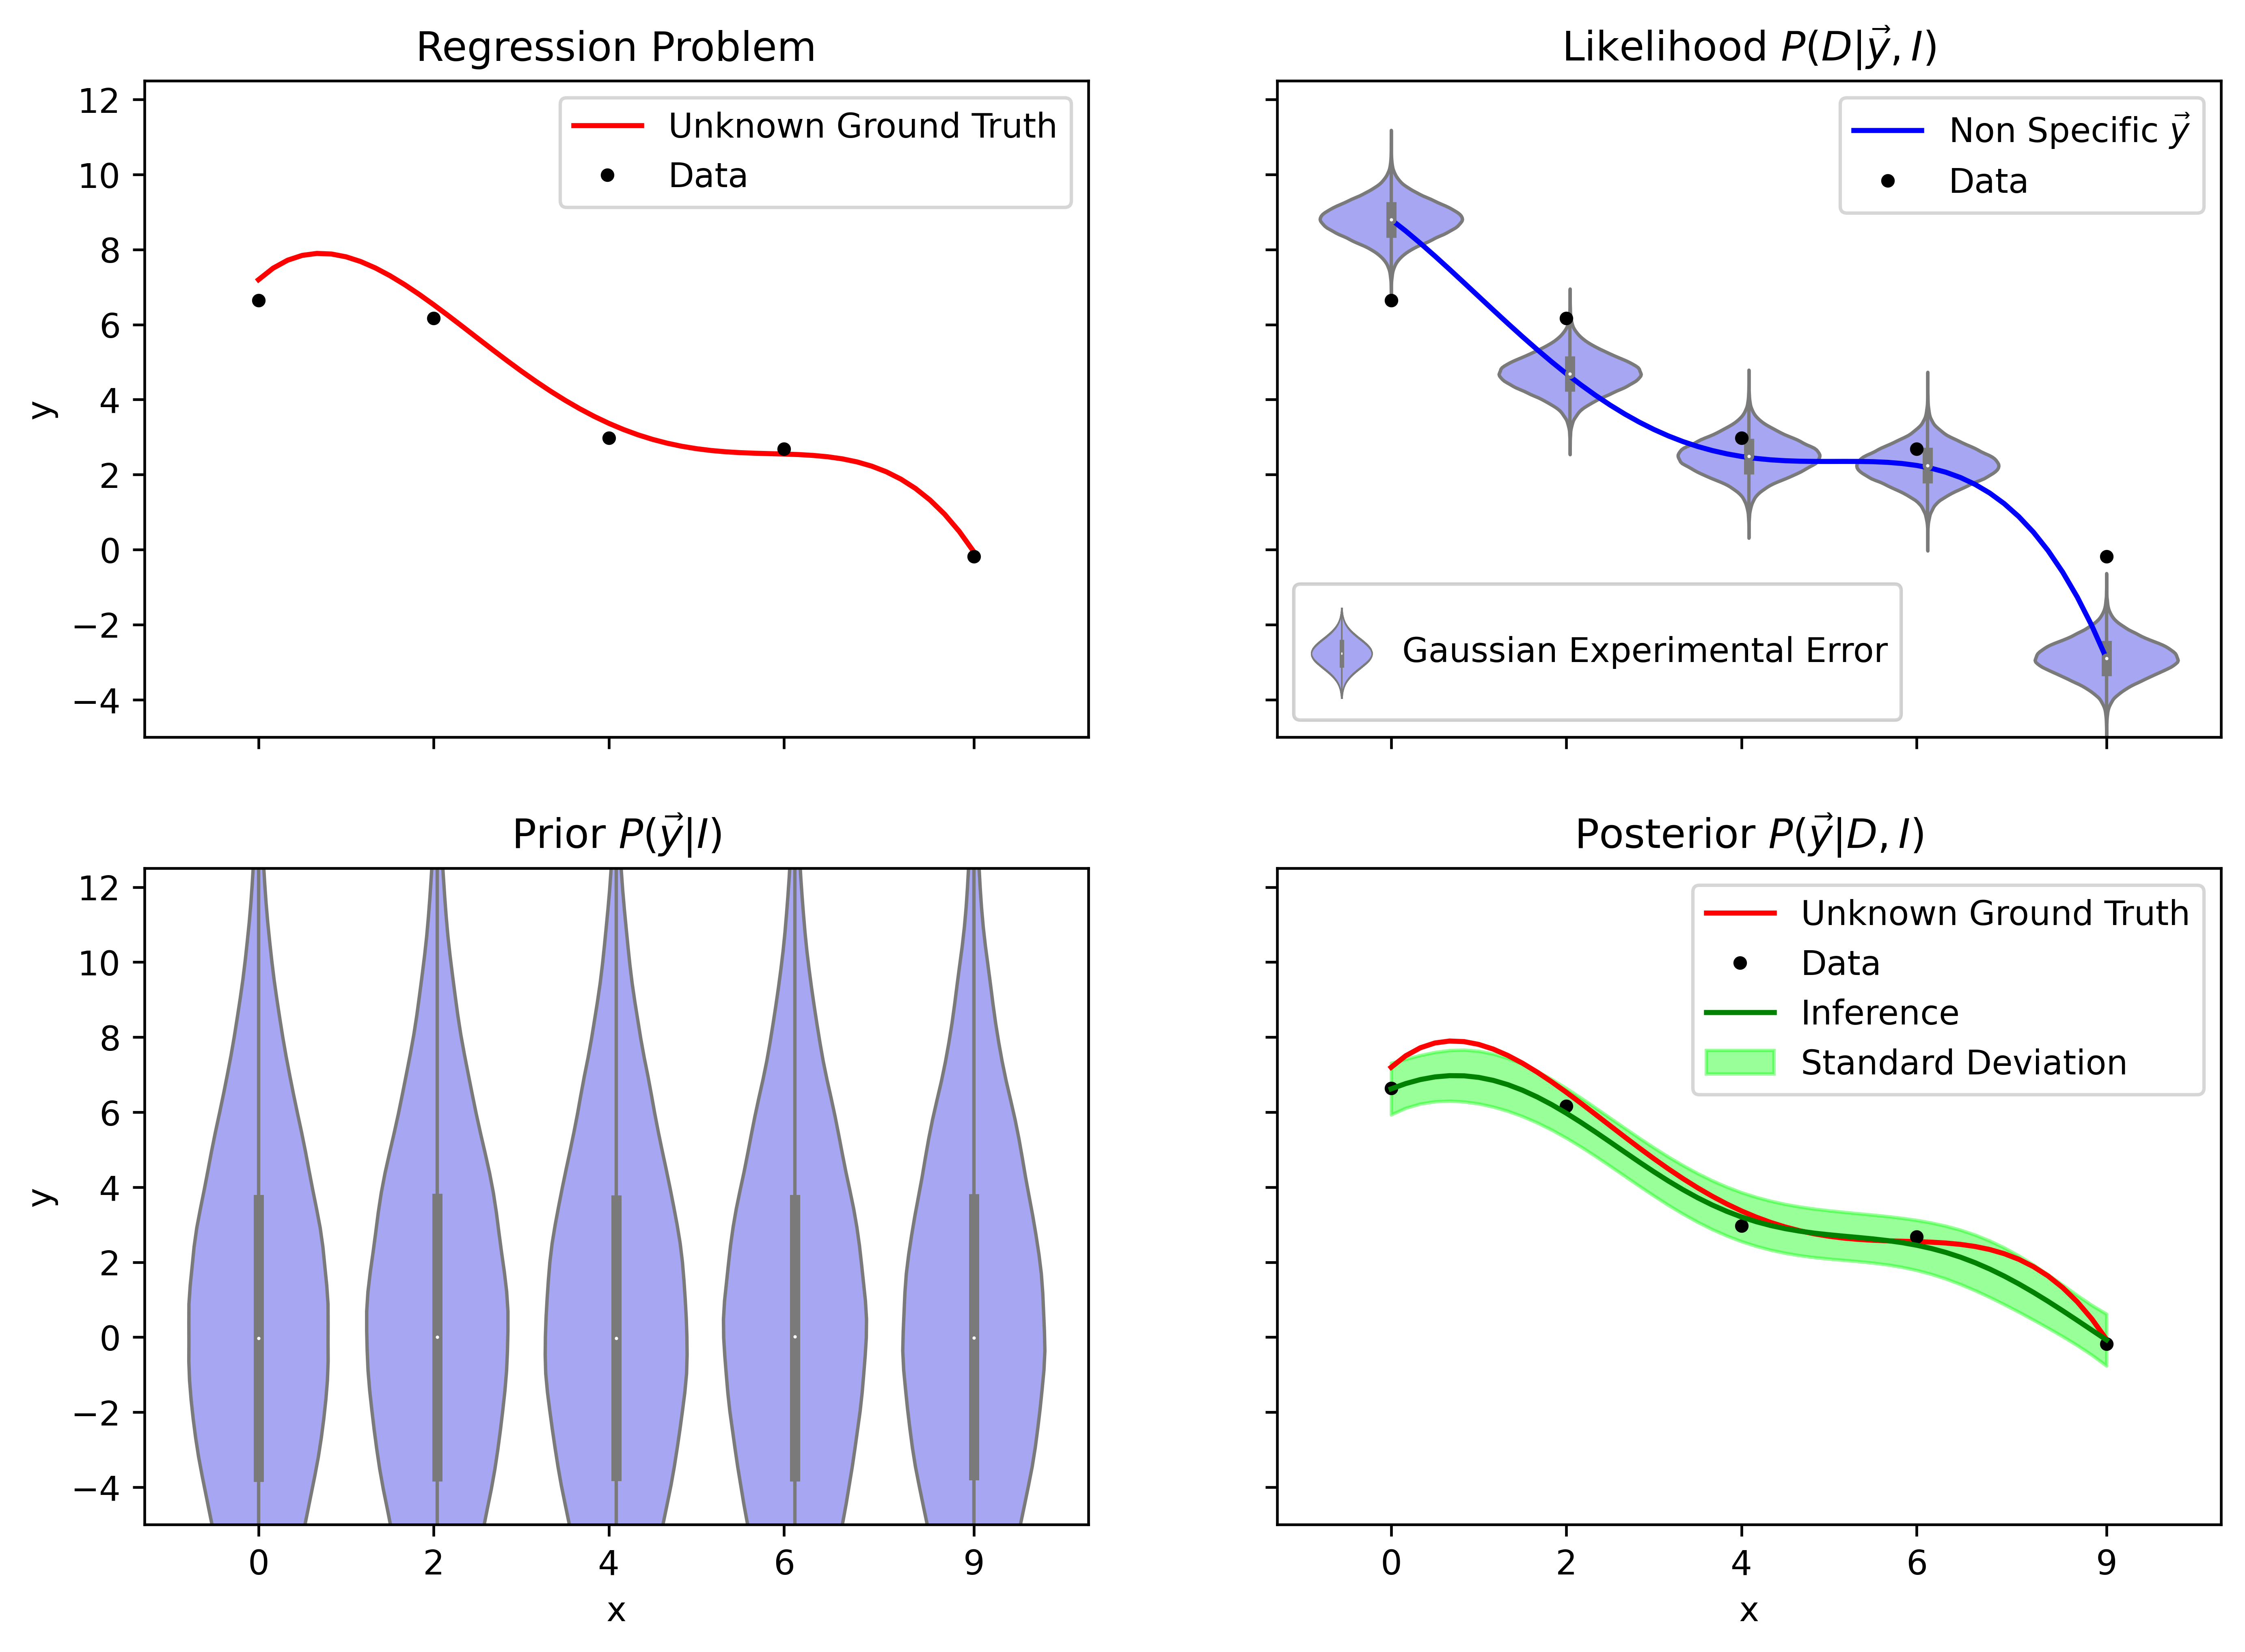

In [8]:
print(xd)

gaussesli = GetGausses(ylik[xd_indicies],np.repeat(exp_er,M),100000)
gaussespr = GetGausses(np.repeat(0,M) ,np.repeat(np.abs(best_params[0]),M),100000)
figGPR, ax = plt.subplots(nrows=2, ncols=2, dpi=600, sharex=True, sharey=True, figsize=(10*1.1,7*1.1))
# ax1, ax2, ax3, ax4 = ax.flatten()
# figGPR = plt.figure(dpi=600)
# plt.plot((xd*(4/9)),yd,'.k', label='Data')

ax[0,0].set_title('Regression Problem')
ax[0,0].plot(x*(4/9),y,'r',label='Unknown Ground Truth')
ax[0,0].plot(xd*(4/9),yd,'.k',label='Data')
ax[0,0].set_ylabel('y')
ax[0,0].legend()

ax[0,1].set_title(r'Likelihood $P(D|\vec{y},I)$')
sn.violinplot(data=gaussesli, color=(0.6,0.6,1,1), linewidth=1, ax=ax[0,1])

# ax[0,1].plot(xd*(4/9),ylik[xd_indicies],'_b')
ax[0,1].plot(x*(4/9),ylik,'b', label=r'Non Specific $\vec{y}$')
# ax[0,1].fill_between([0], [0], [0], color=(0.4,0.4,1,0), edgecolor=(0,0,0,0), label='Gaussian Experimental Error')
ax[0,1].plot(xd*(4/9),yd,'.k', label='Data')
legend1 = ax[0,1].legend()#ax[0,1].legend(ax[0,1].get_lines(), [r'Non Specific $\vec{y}$', "Data"], loc=1)
legend2 = ax[0,1].legend([ax[0,1]],['\nGaussian Experimental Error\n'], handler_map={ax[0,1]: marker_handler}, labelspacing=0, frameon=True,loc='lower left')
ax[0,1].add_artist(legend1)
ax[0,1].add_artist(legend2)

# ax[0,1].legend()

ax[1,0].set_title(r'Prior $P(\vec{y}|I)$')
sn.violinplot(data=gaussespr, color=(0.6,0.6,1,1), linewidth=1, ax=ax[1,0])
# ax[1,0].fill_between([0], [0], [0], color=(0.2,0.2,1,1), edgecolor=(0,0,0,0), label='Gaussian Prior Strength')
# ax[1,0].plot(xd*(4/9), np.repeat(0,M),'_b')
ax[1,0].set_ylabel('y')
ax[1,0].set_xlabel('x')
# ax[1,0].legend([ax[1,0]], ['\nGaussian Prior Strength\n'], handler_map={ax[1,0]: marker_handler}, labelspacing=2,frameon=True, loc='upper left')

# ax[1,0].legend()

ax[1,1].set_title(r'Posterior $P(\vec{y}|D,I)$')
ax[1,1].plot(x*(4/9), y,'r', label='Unknown Ground Truth')
ax[1,1].plot(xd*(4/9), yd,'k.', label='Data')
ax[1,1].plot(x*(4/9),mu_post1,'g', label='Inference')
ax[1,1].fill_between(x*(4/9),mu_post1-error_bars1,mu_post1+error_bars1, color=(0,1,0,0.4), label='Standard Deviation')
ax[1,1].set_xlabel('x')
ax[1,1].legend()

ax[0,1].set_xticks(xd*4/9, xd.astype('int'))
ax[0,1].set_ylim((-5,12.5))
plt.show()

In [ ]:
sn.violinplot(data=gaussesli, color=(0.2,0.2,1,1), linewidth=1, ax=ax[0,1])

<Axes: title={'center': 'Likelihood $P(D|\\vec{y},I)$'}>

In [ ]:
plt.show()

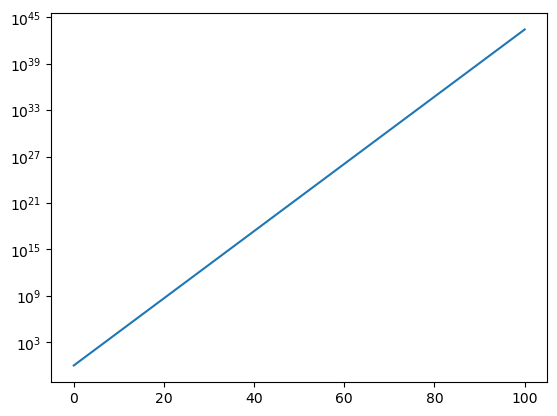

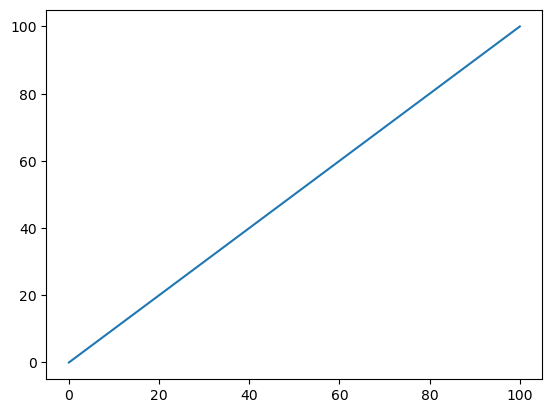

In [ ]:
x = np.linspace(0,100,1000)
y = np.exp(x)
plt.plot(x,y)
plt.yscale('log')

fig = plt.figure()
plt.plot(x,np.log(y))

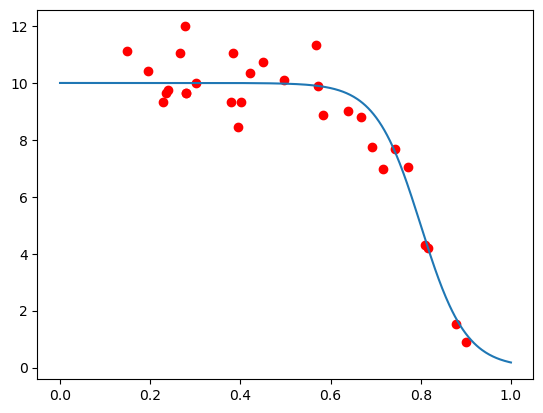

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def HyperBolTan(rho, core, edge , step_center, step_width):
    y = ((core + edge)/2) - (((core - edge)/2) * np.tanh((rho - step_center)/step_width)) 
    return y

npoints=500
rho = np.linspace(0,1,npoints)
y = HyperBolTan(rho,core=10,edge=0, step_center=0.8, step_width=0.1)
noise_scale = 1
noise = np.random.normal(loc=0, scale=noise_scale, size=npoints)
data = y+noise
n_data_points = 30
mask = np.random.choice(len(data),size=n_data_points)
data = data[mask]
plt.plot(rho,y)
plt.scatter(rho[mask],data, color='red')
plt.show()

# Vanilla GRP from hao wu, with gradient info

SHAPE [[1.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e+00 ... 0.e+00 0.e+00 0.e+00]
 ...
 [0.e+00 0.e+00 0.e+00 ... 1.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 1.e-04 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 1.e-04]]
(30, 30) (30, 2) (2, 30) (2, 2)
K shape (32, 32) (32, 32)
SHAPE [[1.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e+00 ... 0.e+00 0.e+00 0.e+00]
 ...
 [0.e+00 0.e+00 0.e+00 ... 1.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 1.e-04 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 1.e-04]]
(30, 30) (30, 2) (2, 30) (2, 2)
K shape (32, 32) (32, 32)
SHAPE [[1.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e+00 ... 0.e+00 0.e+00 0.e+00]
 ...
 [0.e+00 0.e+00 0.e+00 ... 1.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 1.e-04 0.e+00]
 [0.e+00 0.e+00 

/tmp/ipykernel_8307/2298428081.py:152: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


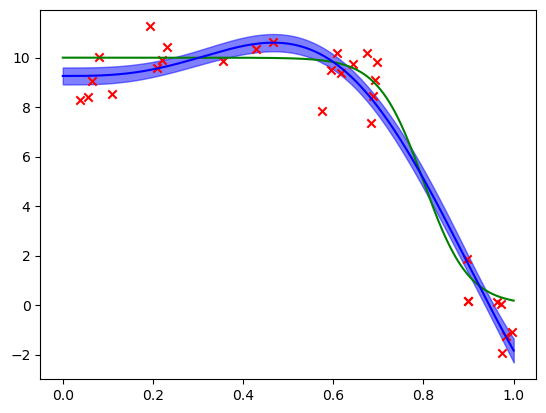

In [33]:
import numpy as np
import logging
from scipy.linalg import inv, cholesky, cho_solve, solve_triangular
from scipy.optimize import minimize

logger = logging.getLogger('lgi')


class GPR(object):
    def __init__(self, x_train, y_train, x_deriv_train=None, y_deriv_train=None,
                 y_train_noise=None, y_deriv_train_noise=None):
        # if x_train is None or y_train is None:
        #     self.x_train = np.array([])
        #     self.y_train = np.array([])
        # else:
        self.x_train = x_train
        self.y_train = y_train
        # if x_deriv_train is None or y_deriv_train is None:
        #     self.x_deriv_train = np.array([])
        #     self.y_deriv_train = np.array([])
        # else:
        self.x_deriv_train = x_deriv_train
        self.y_deriv_train = y_deriv_train
        self.y_train_full = np.hstack([self.y_train, self.y_deriv_train])
        
        #if y_train_noise is None:
         #   y_train_noise = np.zeros_like(y_train)
        #if y_deriv_train_noise is None:
         #   y_deriv_train_noise = np.zeros_like(y_deriv_train)
        self.cov_d = np.diag(np.hstack((y_train_noise**2,
                                        y_deriv_train_noise**2)))
        self.hypers = {'sigma_f': 1.0,
                       'sigma_l': 0.5}

    def get_cov(self):
        """
        Squared exponential kernel
        """
        K_n_n = self.hypers['sigma_f'] ** 2 * \
                np.exp(- 0.5 * (self.x_train[:, np.newaxis] - self.x_train[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        K_n_p = self.hypers['sigma_f'] ** 2 / self.hypers['sigma_l'] ** 2 * \
                (self.x_train[:, np.newaxis] - self.x_deriv_train[np.newaxis, :]) * \
                np.exp(- 0.5 * (self.x_train[:, np.newaxis] - self.x_deriv_train[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        K_p_n = K_n_p.T
        K_p_p = self.hypers['sigma_f'] ** 2 / self.hypers['sigma_l'] ** 2 * \
                (1 - (self.x_deriv_train[:, np.newaxis] - self.x_deriv_train[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2) * \
                np.exp(- 0.5 * (self.x_deriv_train[:, np.newaxis] - self.x_deriv_train[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        print('SHAPE', self.cov_d)
        print(K_n_n.shape,K_n_p.shape,K_p_n.shape,K_p_p.shape)
        K = np.block([[K_n_n, K_n_p],
                      [K_p_n, K_p_p]]) 
        print('K shape', K.shape, self.cov_d.shape)
        K = K + self.cov_d
        K[np.diag_indices_from(K)] += 1e-8
        return K

    def get_cov_star(self, x_test):
        K_n_t = self.hypers['sigma_f'] ** 2 * \
                np.exp(- 0.5 * (self.x_train[:, np.newaxis] - x_test[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        K_p_t = - self.hypers['sigma_f'] ** 2 / self.hypers['sigma_l'] ** 2 * \
                (self.x_deriv_train[:, np.newaxis] - x_test[np.newaxis, :]) * \
                np.exp(- 0.5 * (self.x_deriv_train[:, np.newaxis] - x_test[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        print('kst forming', K_n_t.shape, K_p_t.shape)
        return np.block([[K_n_t], [K_p_t]])

    def get_cov_star_star(self, x_test):
        K = self.hypers['sigma_f'] ** 2 * np.exp(- 0.5 * (x_test[:, np.newaxis] - x_test[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        K[np.diag_indices_from(K)] += 1e-8
        return K

    def set_hypers(self, hypers):
        self.hypers['sigma_f'] = hypers[0]
        self.hypers['sigma_l'] = hypers[1]

    def get_loss(self, hypers):
        self.set_hypers(hypers)
        K = self.get_cov()
        try:
            L = cholesky(K, lower=True, check_finite=False)
        except np.linalg.LinAlgError:
            return np.inf
        # compute the loss
        v = solve_triangular(L, self.y_train_full, lower=True, check_finite=False)
        loss = 2 * np.log(np.diag(L)).sum() + v.T @ v
        logger.debug(f"{['{:.2f}'.format(x) for x in hypers]}: {loss:.2f}")
        return loss

    def fit(self):
        x0 = np.array([self.hypers['sigma_f'], self.hypers['sigma_l']])
        result = minimize(fun=self.get_loss, x0=x0)
        hypers_opt = result.x
        self.hypers['sigma_f'] = hypers_opt[0]
        self.hypers['sigma_l'] = hypers_opt[1]
        print(f"sigma_f = {self.hypers['sigma_f']:.2f}")
        print(f"sigma_l = {self.hypers['sigma_l']:.2f}")

    def predict(self, x_test):
        K = self.get_cov()
        try:
            L = cholesky(K, lower=True, check_finite=False)
        except np.linalg.LinAlgError as exc:
            exc.args = (
                           "The kernel is not returning a positive "
                           "definite matrix.",
                       ) + exc.args
            raise
        K_star = self.get_cov_star(x_test)
        print(K_star.shape)
        K_star_star = self.get_cov_star_star(x_test)
        alpha = cho_solve((L, True), self.y_train_full, check_finite=False)
        y_star = K_star.T @ alpha
        v = solve_triangular(L, K_star, lower=True, check_finite=False)
        cov_star = K_star_star - v.T @ v
        post_mean = y_star
        post_cov = cov_star
        return post_mean, post_cov

if __name__ == '__main__':
    # def y_fun(x, noise_sigma=0.0):
    #     x = np.asarray(x)
    #     y = np.cos(x) + np.random.normal(0, noise_sigma, size=x.shape)
    #     return y

    # x_train = np.array([1, 3, 4, 5, 9])
    # noise = 0.2
    # y_train = y_fun(x_train, noise_sigma=noise)#1e-4)
    # x_deriv_train = np.array([0.0, 2 * np.pi])
    # y_deriv_train = np.array([0.0, 0.0])
    x_test = rho#np.linspace(0, 9, 101)
    x_train = rho[mask]
    y_train = data
    x_deriv_train = np.array([0,0.01])
    y_deriv_train = np.array([0,0])
    y_train_noise = np.repeat(noise_scale, len(y_train))
    gpr = GPR(x_train, y_train, x_deriv_train, y_deriv_train, y_train_noise=y_train_noise, y_deriv_train_noise=np.repeat(0.01,len(y_deriv_train)))
    gpr.fit()
    y_test, cov_test = gpr.predict(x_test)

    print('LENGHT',len(y_test), len(x_test))


    print(cov_test[0,0])
    std = np.sqrt(np.diag(cov_test))
    y_lower = y_test - std
    y_upper = y_test + std
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x_test, y, label='GROUND TRUTH', color='green')
    ax.plot(x_test, y_test, 'b-')
    ax.fill_between(x_test, y_lower, y_upper, color='blue', alpha=0.5)
    ax.scatter(x_train, y_train, color='red', marker='x')
    fig.show()

/tmp/ipykernel_144284/458561437.py:173: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_144284/458561437.py:198: RuntimeWarning: invalid value encountered in sqrt
  std = np.sqrt(np.diag(cov_test))
/tmp/ipykernel_144284/458561437.py:213: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


BEST PARAMS [ 9.99492280e+00  1.00000555e+01 -7.18406518e-08  7.99999955e-01
  4.32640373e-01  0.00000000e+00]
kst forming (60, 50) (2, 50)
(62, 50)
-2.1708895292884023


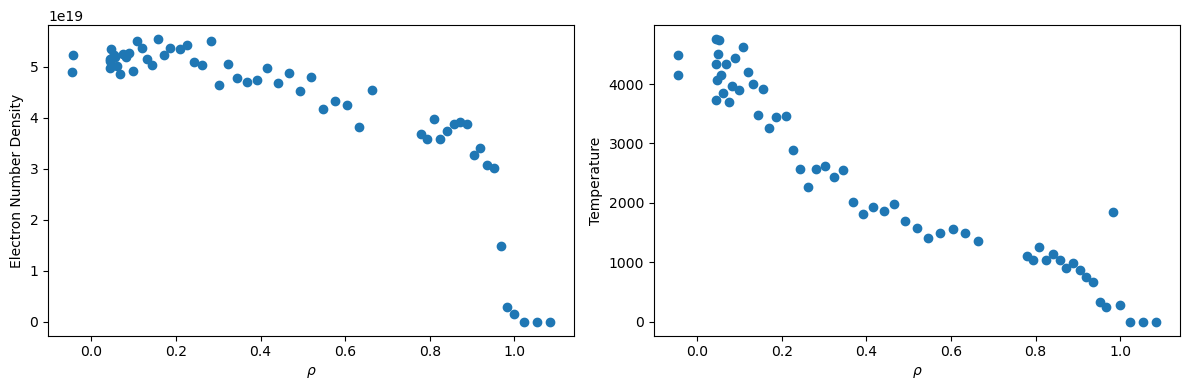

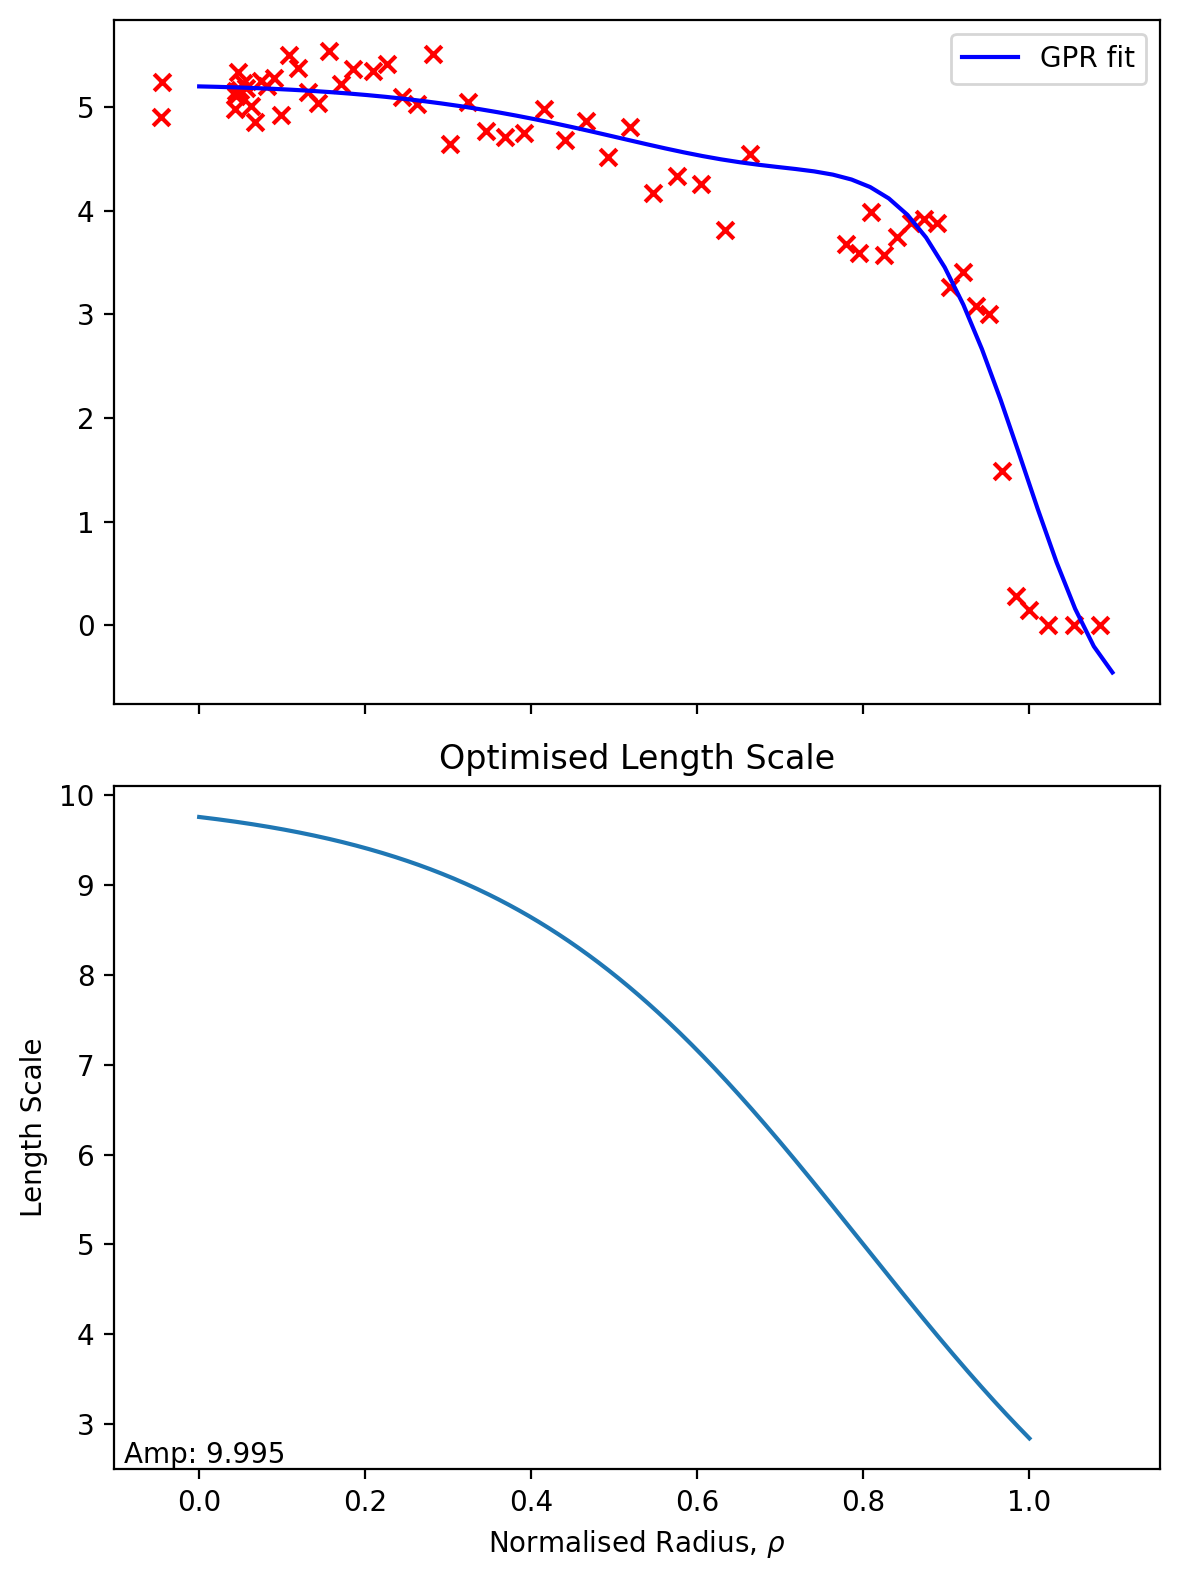

In [15]:
###################################### """"""""""222222222222222222222222222222

kernel = HyperKernel()


import numpy as np
import matplotlib.pyplot as plt
def HyperBolTan(rho, core, edge , step_center, step_width):
    y = ((core + edge)/2) - (((core - edge)/2) * np.tanh((rho - step_center)/step_width)) 
    return y

npoints=500
rho = np.linspace(0,1,npoints)
y = HyperBolTan(rho,core=10,edge=0, step_center=0.8, step_width=0.1)
noise = np.random.normal(loc=0, scale=1, size=npoints)
yd = y+noise
xd = rho



import numpy as np
import logging
from scipy.linalg import inv, cholesky, cho_solve, solve_triangular
from scipy.optimize import minimize

logger = logging.getLogger('lgi')


class GPR(object):
    def __init__(self, x_train, y_train, x_deriv_train=None, y_deriv_train=None,
                y_train_noise=None, y_deriv_train_noise=None, initial_params=None, kernel=None):
        self.kernel = kernel
        self.best_params = None
        if x_train is None or y_train is None:
            self.x_train = np.array([])
            self.y_train = np.array([])
        else:
            self.x_train = x_train
            self.y_train = y_train
        if x_deriv_train is None or y_deriv_train is None:
            self.x_deriv_train = np.array([])
            self.y_deriv_train = np.array([])
        else:
            self.x_deriv_train = x_deriv_train
            self.y_deriv_train = y_deriv_train
        self.y_train_full = np.hstack([self.y_train, self.y_deriv_train])
        if y_train_noise is None:
            y_train_noise = np.zeros_like(y_train)
        if y_deriv_train_noise is None:
            y_deriv_train_noise = np.zeros_like(y_deriv_train)
        self.cov_d = np.diag(np.hstack((y_train_noise**2,
                                        y_deriv_train_noise**2)))
        self.initial_params = initial_params
        # self.hypers = {'sigma_f': 1.0,
        #             'sigma_l': 0.5}

    def get_cov(self, params):
        """
        Squared exponential kernel
        """
        K_n_n = self.kernel.Kernel(rho1=self.x_train, rho2=x_train, params=params)#self.hypers['sigma_f'] ** 2 * \
                #np.exp(- 0.5 * (self.x_train[:, np.newaxis] - self.x_train[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        K_n_p = self.kernel.KernelPrime(self.x_deriv_train, self.x_train, params)#self.hypers['sigma_f'] ** 2 / self.hypers['sigma_l'] ** 2 * \
                #(self.x_train[:, np.newaxis] - self.x_deriv_train[np.newaxis, :]) * \
                #np.exp(- 0.5 * (self.x_train[:, np.newaxis] - self.x_deriv_train[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        K_p_n = K_n_p.T
        K_p_p = self.kernel.KernelPrimePrime(self.x_deriv_train,self.x_deriv_train, params)#self.hypers['sigma_f'] ** 2 / self.hypers['sigma_l'] ** 2 * \
                #(1 - (self.x_deriv_train[:, np.newaxis] - self.x_deriv_train[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2) * \
                #np.exp(- 0.5 * (self.x_deriv_train[:, np.newaxis] - self.x_deriv_train[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        #print(K_n_n.shape,K_n_p.shape,K_p_n.shape,K_p_p.shape)
        K = np.block([[K_n_n, K_n_p],
                    [K_p_n, K_p_p]]) + self.cov_d
        K[np.diag_indices_from(K)] += 1e-8
        return K

    def get_cov_star(self, x_test, params):
        K_n_t = self.kernel.Kernel(x_test,x_train, params)#self.hypers['sigma_f'] ** 2 * \
                #np.exp(- 0.5 * (self.x_train[:, np.newaxis] - x_test[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        K_p_t = self.kernel.KernelPrime(x_test, x_deriv_train, params)#- self.hypers['sigma_f'] ** 2 / self.hypers['sigma_l'] ** 2 * \
                #(self.x_deriv_train[:, np.newaxis] - x_test[np.newaxis, :]) * \
                #np.exp(- 0.5 * (self.x_deriv_train[:, np.newaxis] - x_test[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        print('kst forming', K_n_t.shape, K_p_t.shape)
        return np.block([[K_n_t], [K_p_t]])

    def get_cov_star_star(self, x_test, params):
        K = kernel.Kernel(x_test, x_test, params)#self.hypers['sigma_f'] ** 2 * np.exp(- 0.5 * (x_test[:, np.newaxis] - x_test[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        K[np.diag_indices_from(K)] += 1e-8
        return K

    # def set_hypers(self, hypers):
    #     self.hypers['sigma_f'] = hypers[0]
    #     self.hypers['sigma_l'] = hypers[1]

    def get_loss(self, params):
        #self.set_hypers(hypers)
        K = self.get_cov(params)
        try:
            L = cholesky(K, lower=True, check_finite=False)
        except np.linalg.LinAlgError:
            return np.inf
        # compute the loss
        v = solve_triangular(L, self.y_train_full, lower=True, check_finite=False)
        loss = 2 * np.log(np.diag(L)).sum() + v.T @ v
        #logger.debug(f"{['{:.2f}'.format(x) for x in hypers]}: {loss:.2f}")
        return loss

    def fit(self):
        # x0 = np.array([self.hypers['sigma_f'], self.hypers['sigma_l']])
        result = minimize(fun=self.get_loss, x0=self.initial_params)
        self.best_params = result.x
        print('BEST PARAMS', self.best_params)
        return self.best_params
        # self.hypers['sigma_f'] = hypers_opt[0]
        # self.hypers['sigma_l'] = hypers_opt[1]
        # print(f"sigma_f = {self.hypers['sigma_f']:.2f}")
        # print(f"sigma_l = {self.hypers['sigma_l']:.2f}")

    def predict(self, x_test, params):
        K = self.get_cov(params)
        try:
            L = cholesky(K, lower=True, check_finite=False)
        except np.linalg.LinAlgError as exc:
            exc.args = (
                        "The kernel is not returning a positive "
                        "definite matrix.",
                    ) + exc.args
            raise
        K_star = self.get_cov_star(x_test, params)
        print(K_star.shape)
        K_star_star = self.get_cov_star_star(x_test, params)
        alpha = cho_solve((L, True), self.y_train_full, check_finite=False)
        y_star = K_star.T @ alpha
        v = solve_triangular(L, K_star, lower=True, check_finite=False)
        cov_star = K_star_star - v.T @ v
        post_mean = y_star
        post_cov = cov_star
        return post_mean, post_cov

if __name__ == '__main__':
    
    import pickle
    import numpy as np
    import matplotlib.pyplot as plt

    shot_num = 86638

    with open(f'/home/djdaniel/FusionProfileInference/thompson_data/{shot_num}', 'rb') as file:
        pulse_dict = pickle.load(file)

    ne, te, ne_unc, te_unc, radius, time = pulse_dict['profiles']['ne'], pulse_dict['profiles']['Te'], pulse_dict['profiles']['ne_unc'], pulse_dict['profiles']['Te_unc'], pulse_dict['profiles']['radius'], pulse_dict['profiles']['time']


    t_idx = 178

    height = 4
    width = 6
    ncol = 2
    nrow = 1
    fig, [axTe, axne] = plt.subplots(nrow,ncol, figsize=(ncol*width,nrow*height), dpi=100)

    rho_real = radius[t_idx, :]
    ne = ne[t_idx, :]
    axTe.scatter(rho_real, ne)
    axTe.set_xlabel(r'$\rho$')
    axTe.set_ylabel('Electron Number Density')

    Te = te[t_idx, :]
    axne.scatter(rho_real, Te)
    axne.set_ylabel('Temperature')
    axne.set_xlabel(r'$\rho$')

    fig.tight_layout()
    fig.show()

    x_test = np.linspace(0,1.1)#rho#np.linspace(0, 9, 101)
    x_train = rho_real#rho[mask]
    y_train = ne*10**-19#data
    x_deriv_train = np.array([0,0.01])
    y_deriv_train = np.array([0,0])
    y_train_noise = np.repeat(0.5, len(y_train))#np.repeat(noise_scale, len(y_train))
    
    
    
    #core=10,edge=0, step_center=0.8, step_width=0.1
    initial_params = [10, 10, 0, 0.8, 0.1, 0]#scipyMAP#[45.7201, 1.9773, 0.9528, 1.0420, 0.1536, 0.2766]#np.array([4, 0.9, 0.01, 0.8, 0.05, 0.5])
    kernel = HyperKernel()

    gpr = GPR(x_train, y_train, x_deriv_train, y_deriv_train, y_train_noise=y_train_noise, y_deriv_train_noise=np.repeat(0.01,len(y_deriv_train)),kernel=kernel, initial_params=initial_params)
    
    
    

    

    best_params = gpr.fit()
    y_test, cov_test = gpr.predict(x_test, best_params)
    print(cov_test[0,0])
    std = np.sqrt(np.diag(cov_test))
    y_lower = y_test - std
    y_upper = y_test + std
    width = 6
    height = 4
    ncol = 1
    nrow = 2
    fig, [ax1, ax2] = plt.subplots(2,1, figsize=(ncol*width,nrow*height), sharex = True, dpi = 200)
    #ax1.plot(x_test, y, label='GROUND TRUTH', color='green')
    ax1.plot(x_test, y_test, 'b-', label = 'GPR fit')
    ax1.fill_between(x_test, y_lower, y_upper, color='blue', alpha=0.2)
    ax1.scatter(x_train, y_train, color='red', marker='x')
    kernel.Plot_l(rho,best_params, tensor = False,ax=ax2, title = 'Optimised Length Scale')
    ax1.legend()
    fig.tight_layout()
    fig.show()

In [8]:
class HyperKernel():
    def __init__(self):
        None
    def HyperTan_l(self, rho, params, tensor):
        core_l, edge_l, transition_center, transition_width = params[1:-1]
        if tensor:
            l = ((core_l + edge_l)/2) - (((core_l - edge_l)/2) * torch.tanh((rho - transition_center)/transition_width)).float()
        else:
            l = ((core_l + edge_l)/2) - (((core_l - edge_l)/2) * np.tanh((rho - transition_center)/transition_width)) 
        return l
    
    def Plot_l(self,rho,params, tensor, ax, title):
        l = HyperTan_l(rho, params, tensor)
#             figLengthScale = plt.figure(dpi=300)
        ax.plot(rho,l)
        if type(title) != type(None):ax.set_title(title)
        if type(title) != type(None):ax.set_xlabel(r'Normalised Radius, $\rho$')
        if type(title) != type(None):ax.set_ylabel(r'Length Scale')
        ax.annotate("Amp: "+str(np.round(params[0],3)), xy=(0.01,0.01),xycoords='axes fraction')
       
    def Kernel(self, rho1,rho2,params, tensor=False):
        l1 = HyperTan_l(rho1, params, tensor=tensor)
        l2 = HyperTan_l(rho2, params, tensor=tensor)
        if tensor:
            RHOA, RHOB = torch.meshgrid(rho1,rho2)
            LA, LB = torch.meshgrid(l1,l2)

        else: 
            RHOA, RHOB = np.meshgrid(rho1,rho2)
            LA, LB = np.meshgrid(l1,l2)

        #amplitude determins how far the model can go from the mean
        amp = params[0]
        #length scale determines smoothness, how correlated the function should be at a distance
        mag = (RHOA - RHOB) * (RHOA - RHOB)
        scale1 = 2 * LA * LB
        scale2 = (LA * LA) + (LB * LB)
        frac = (scale1/scale2)
        if tensor: return (amp**2 * torch.sqrt(frac) * torch.exp(-mag/scale2)).T
        else: return amp**2 * np.sqrt(frac) * np.exp(-mag/scale2)

    def KernelPrime(self, rho1,rho2,params, tensor=False):
        l1 = HyperTan_l(rho1, params, tensor=tensor)
        l2 = HyperTan_l(rho2, params, tensor=tensor)
        if tensor:
            RHOA, RHOB = torch.meshgrid(rho1,rho2)
            LA, LB = torch.meshgrid(l1,l2)

        else: 
            RHOA, RHOB = np.meshgrid(rho1,rho2)
            LA, LB = np.meshgrid(l1,l2)

        #amplitude determins how far the model can go from the mean
        amp = params[0]
        #length scale determines smoothness, how correlated the function should be at a distance
        mag = (RHOA - RHOB) * (RHOA - RHOB)
        scale1 = 2 * LA * LB
        scale2 = (LA * LA) + (LB * LB)
        frac = (scale1/scale2) 
        if tensor:
            return (amp**2*2*torch.sqrt(frac)/scale2 * (RHOA-RHOB) * torch.exp(-mag/scale2)).T
        else: 
            return amp**2*2*np.sqrt(frac)/scale2 * (RHOA-RHOB) * np.exp(-mag/scale2)

    def KernelPrimePrime(self, rho1,rho2,params, tensor=False):
        l1 = HyperTan_l(rho1, params, tensor=tensor)
        l2 = HyperTan_l(rho2, params, tensor=tensor)
        if tensor:
            RHOA, RHOB = torch.meshgrid(rho1,rho2)
            LA, LB = torch.meshgrid(l1,l2)

        else: 
            RHOA, RHOB = np.meshgrid(rho1,rho2)
            LA, LB = np.meshgrid(l1,l2)

        #amplitude determins how far the model can go from the mean
        amp = params[0]
        #length scale determines smoothness, how correlated the function should be at a distance
        mag = (RHOA - RHOB) * (RHOA - RHOB)
        scale1 = 2 * LA * LB
        scale2 = (LA * LA) + (LB * LB)
        frac = (scale1/scale2)
        if tensor:
            return (amp**2*2*torch.sqrt(frac)/scale2 * (1 - mag*2/scale2) * torch.exp(-mag/scale2)).T
        else: return amp**2*2*np.sqrt(frac)/scale2 * (1 - mag*2/scale2) * np.exp(-mag/scale2)

        

if __name__ == '__main__':
    def HyperTan_l(rho, params, tensor):
            core_l, edge_l, transition_center, transition_width = params[1:-1]
            if tensor:
                l = ((core_l + edge_l)/2) - (((core_l - edge_l)/2) * torch.tanh((rho - transition_center)/transition_width)).float()
            else:
                l = ((core_l + edge_l)/2) - (((core_l - edge_l)/2) * np.tanh((rho - transition_center)/transition_width)) 
            return l
    def Plot_l(rho,params, tensor, ax, title):
        l = HyperTan_l(rho, params, tensor)
#             figLengthScale = plt.figure(dpi=300)
        ax.plot(rho,l)
        if type(title) != type(None):ax.set_title(title)
        if type(title) != type(None):ax.set_xlabel(r'Normalised Radius, $\rho$')
        if type(title) != type(None):ax.set_ylabel(r'Length Scale')
        ax.annotate("Amp: "+str(np.round(params[0],3))+"\nExp Er: "+str(np.round(params[-1],3)), xy=(0.01,0.01),xycoords='axes fraction')
    
    def Kernel(rho1,rho2,params, tensor=False):
        l1 = HyperTan_l(rho1, params, tensor=tensor)
        l2 = HyperTan_l(rho2, params, tensor=tensor)
        if tensor:
            RHOA, RHOB = torch.meshgrid(rho1,rho2)
            LA, LB = torch.meshgrid(l1,l2)

        else: 
            RHOA, RHOB = np.meshgrid(rho1,rho2)
            LA, LB = np.meshgrid(l1,l2)

        #amplitude determins how far the model can go from the mean
        amp = params[0]
        #length scale determines smoothness, how correlated the function should be at a distance
        mag = (RHOA - RHOB) * (RHOA - RHOB)
        scale1 = 2 * LA * LB
        scale2 = (LA * LA) + (LB * LB)
        frac = (scale1/scale2)
        if tensor: return (amp**2 * torch.sqrt(frac) * torch.exp(-mag/scale2)).T
        else: return amp**2 * np.sqrt(frac) * np.exp(-mag/scale2)

    def KernelPrime(rho1,rho2,params, tensor=False):
        l1 = HyperTan_l(rho1, params, tensor=tensor)
        l2 = HyperTan_l(rho2, params, tensor=tensor)
        if tensor:
            RHOA, RHOB = torch.meshgrid(rho1,rho2)
            LA, LB = torch.meshgrid(l1,l2)

        else: 
            RHOA, RHOB = np.meshgrid(rho1,rho2)
            LA, LB = np.meshgrid(l1,l2)

        #amplitude determins how far the model can go from the mean
        amp = params[0]
        #length scale determines smoothness, how correlated the function should be at a distance
        mag = (RHOA - RHOB) * (RHOA - RHOB)
        scale1 = 2 * LA * LB
        scale2 = (LA * LA) + (LB * LB)
        frac = (scale1/scale2) 
        if tensor:
            return (amp**2*2*torch.sqrt(frac)/scale2 * (RHOA-RHOB) * torch.exp(-mag/scale2)).T
        else: 
            return amp**2*2*np.sqrt(frac)/scale2 * (RHOA-RHOB) * np.exp(-mag/scale2)

    def KernelPrimePrime(rho1,rho2,params, tensor=False):
        l1 = HyperTan_l(rho1, params, tensor=tensor)
        l2 = HyperTan_l(rho2, params, tensor=tensor)
        if tensor:
            RHOA, RHOB = torch.meshgrid(rho1,rho2)
            LA, LB = torch.meshgrid(l1,l2)

        else: 
            RHOA, RHOB = np.meshgrid(rho1,rho2)
            LA, LB = np.meshgrid(l1,l2)

        #amplitude determins how far the model can go from the mean
        amp = params[0]
        #length scale determines smoothness, how correlated the function should be at a distance
        mag = (RHOA - RHOB) * (RHOA - RHOB)
        scale1 = 2 * LA * LB
        scale2 = (LA * LA) + (LB * LB)
        frac = (scale1/scale2)
        if tensor:
            return (amp**2*2*torch.sqrt(frac)/scale2 * (1 - mag*2/scale2) * torch.exp(-mag/scale2)).T
        else: return amp**2*2*np.sqrt(frac)/scale2 * (1 - mag*2/scale2) * np.exp(-mag/scale2)

    #large l for first three 

    names_params = ['Amplitude','Core Length Scale','Edge Length Scale','Transition Center','Transition Width', 'Experimental Error']
    suitable_params_range = [(1,100),(0,2),(0,2),(0.5,1),(0.01,0.5),(0.03,0.5)]
    initial_params = [6.85237222, 1.38585566, 2.0, 0.64754819, 0.5, 0.03]#scipyMAP#[45.7201, 1.9773, 0.9528, 1.0420, 0.1536, 0.2766]#np.array([4, 0.9, 0.01, 0.8, 0.05, 0.5])

    def RandomKernelInit(NUM_RANDOM_SEARCHES, tensor):
        amp_dist = torch.distributions.uniform.Uniform(suitable_params_range[0][0], suitable_params_range[0][1])
        core_dist = torch.distributions.uniform.Uniform(suitable_params_range[1][0], suitable_params_range[1][1])
#         edge_dist = torch.distributions.uniform.Uniform(suitable_params_range[2][0], suitable_params_range[2][1])
        t_center_dist = torch.distributions.uniform.Uniform(suitable_params_range[3][0], suitable_params_range[3][1])
        t_width_dist = torch.distributions.uniform.Uniform(suitable_params_range[4][0], suitable_params_range[4][1])
        exp_er_dist = torch.distributions.uniform.Uniform(suitable_params_range[5][0], suitable_params_range[5][1])
        kernel_params = []    
        for balls in range(NUM_RANDOM_SEARCHES):
            amp = amp_dist.sample()
            core_l = core_dist.sample() 
            #ensure edge_l is smaller than core
            edge_dist = torch.distributions.uniform.Uniform(0, core_l)
            edge_l = edge_dist.sample()
            transition_center = t_center_dist.sample()
            transition_width = t_width_dist.sample()
            exp_er = exp_er_dist.sample()
            kp = [amp,core_l,edge_l,transition_center,transition_width,exp_er]
            kernel_params.append(kp)
        if not tensor:
            kernel_params = [[kp_i.numpy() for kp_i in kp] for kp in kernel_params]
        return kernel_params
    import numpy as np
    rho = np.linspace(0,1,100)
    Kernel(rho, rho, initial_params, tensor=False)
    



In [ ]:
import numpy as np
a = np.array([1,2,3])
b = np.array([1,2,4])
c = np.array([1,2,5])
d = np.array([1,2,6])
K = np.block([[a, b],
            [c, d]])
K

array([[1, 2, 3, 1, 2, 4],
       [1, 2, 5, 1, 2, 6]])

In [11]:
import numpy as np
import logging
from scipy.linalg import inv, cholesky, cho_solve, solve_triangular
from scipy.optimize import minimize

logger = logging.getLogger('lgi')


class GPR(object):
    def __init__(self, x_train, y_train, x_deriv_train=None, y_deriv_train=None,
                 y_train_noise=None, y_deriv_train_noise=None):
        M = len(x_train)
        M_p = len(x_deriv_train)
        if x_train is None or y_train is None:
            self.x_train = np.array([])
            self.y_train = np.array([])
        else:
            self.x_train = x_train
            self.y_train = y_train
        if x_deriv_train is None or y_deriv_train is None:
            self.x_deriv_train = np.array([])
            self.y_deriv_train = np.array([])
        else:
            self.x_deriv_train = x_deriv_train
            self.y_deriv_train = y_deriv_train
        self.y_train_full = np.hstack([self.y_train, self.y_deriv_train])
        if y_train_noise is None:
            y_train_noise = np.zeros_like(y_train)
        if y_deriv_train_noise is None:
            y_deriv_train_noise = np.zeros_like(y_deriv_train)
        self.cov_d = np.diag(np.hstack((y_train_noise**2,
                                        y_deriv_train_noise**2)))
        self.prior_mean = None
        self.prior_kernel = None
        self.hypers = {'amp_n': np.repeat(1,M),
                       'amp_p': np.repeat(1,M_p),
                       'l_n': np.repeat(0.5,M),
                       'l_p': np.repeat(0.5,M_p)}

    def get_cov(self):
        """
        Squared exponential kernel
        """
        K_n_n = self.hypers['sigma_f'] ** 2 * \
                np.exp(- 0.5 * (self.x_train[:, np.newaxis] - self.x_train[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        K_n_p = self.hypers['sigma_f'] ** 2 / self.hypers['sigma_l'] ** 2 * \
                (self.x_train[:, np.newaxis] - self.x_deriv_train[np.newaxis, :]) * \
                np.exp(- 0.5 * (self.x_train[:, np.newaxis] - self.x_deriv_train[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        K_p_n = K_n_p.T
        K_p_p = self.hypers['sigma_f'] ** 2 / self.hypers['sigma_l'] ** 2 * \
                (1 - (self.x_deriv_train[:, np.newaxis] - self.x_deriv_train[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2) * \
                np.exp(- 0.5 * (self.x_deriv_train[:, np.newaxis] - self.x_deriv_train[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        K = np.block([[K_n_n, K_n_p],
                      [K_p_n, K_p_p]]) + self.cov_d
        K[np.diag_indices_from(K)] += 1e-8
        return K

    def get_cov_star(self, x_test):
        K_n_t = self.hypers['sigma_f'] ** 2 * \
                np.exp(- 0.5 * (self.x_train[:, np.newaxis] - x_test[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        K_p_t = - self.hypers['sigma_f'] ** 2 / self.hypers['sigma_l'] ** 2 * \
                (self.x_deriv_train[:, np.newaxis] - x_test[np.newaxis, :]) * \
                np.exp(- 0.5 * (self.x_deriv_train[:, np.newaxis] - x_test[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        return np.block([[K_n_t], [K_p_t]])

    def get_cov_star_star(self, x_test):
        K = self.hypers['sigma_f'] ** 2 * np.exp(- 0.5 * (x_test[:, np.newaxis] - x_test[np.newaxis, :]) ** 2 / self.hypers['sigma_l'] ** 2)
        K[np.diag_indices_from(K)] += 1e-8
        return K

    def set_hypers(self, hypers):
        self.hypers['sigma_f'] = hypers[0]
        self.hypers['sigma_l'] = hypers[1]

    def get_loss(self, hypers):
        self.set_hypers(hypers)
        K = self.get_cov()
        try:
            L = cholesky(K, lower=True, check_finite=False)
        except np.linalg.LinAlgError:
            return np.inf
        # compute the loss
        v = solve_triangular(L, self.y_train_full, lower=True, check_finite=False)
        loss = 2 * np.log(np.diag(L)).sum() + v.T @ v
        logger.debug(f"{['{:.2f}'.format(x) for x in hypers]}: {loss:.2f}")
        return loss

    def fit(self):
        print(self.hypers.values())
        x0 = np.fromiter(self.hypers.values(),dtype='float')#np.array([self.hypers['sigma_f'], self.hypers['sigma_l']])
        result = minimize(fun=self.get_loss, x0=x0)
        hypers_opt = result.x
        self.hypers['sigma_f'] = hypers_opt[0]
        self.hypers['sigma_l'] = hypers_opt[1]
        print(f"sigma_f = {self.hypers['sigma_f']:.2f}")
        print(f"sigma_l = {self.hypers['sigma_l']:.2f}")

    def predict(self, x_test):
        K = self.get_cov()
        try:
            L = cholesky(K, lower=True, check_finite=False)
        except np.linalg.LinAlgError as exc:
            exc.args = (
                           "The kernel is not returning a positive "
                           "definite matrix.",
                       ) + exc.args
            raise
        K_star = self.get_cov_star(x_test)
        K_star_star = self.get_cov_star_star(x_test)
        alpha = cho_solve((L, True), self.y_train_full, check_finite=False)
        y_star = K_star.T @ alpha
        v = solve_triangular(L, K_star, lower=True, check_finite=False)
        cov_star = K_star_star - v.T @ v
        post_mean = y_star
        post_cov = cov_star
        return post_mean, post_cov

if __name__ == '__main__':
    def y_fun(x, noise_sigma=0.0):
        x = np.asarray(x)
        y = np.cos(x) + np.random.normal(0, noise_sigma, size=x.shape)
        return y

    x_train = np.array([1, 3, 4, 5, 9])
    y_train = y_fun(x_train, noise_sigma=1e-4)
    x_deriv_train = np.array([0.0, 2 * np.pi])
    y_deriv_train = np.array([0.0, 0.0])
    x_test = np.linspace(0, 9, 100)
    gpr = GPR(x_train, y_train, x_deriv_train, y_deriv_train)
    gpr.fit()
    y_test, cov_test = gpr.predict(x_test)
    std = np.sqrt(np.diag(cov_test))
    y_lower = y_test - std
    y_upper = y_test + std
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x_test, y_test, 'b-')
    ax.fill_between(x_test, y_lower, y_upper, color='blue', alpha=0.5)
    ax.scatter(x_train, y_train, color='red', marker='x')
    fig.show()

dict_values([array([1, 1, 1, 1, 1]), array([1, 1]), array([0.5, 0.5, 0.5, 0.5, 0.5]), array([0.5, 0.5])])


ValueError: setting an array element with a sequence.

In [ ]:
import numpy as np
a = np.array([1,2,3,4])
# a[:,np.newaxis]
a

array([1, 2, 3, 4])

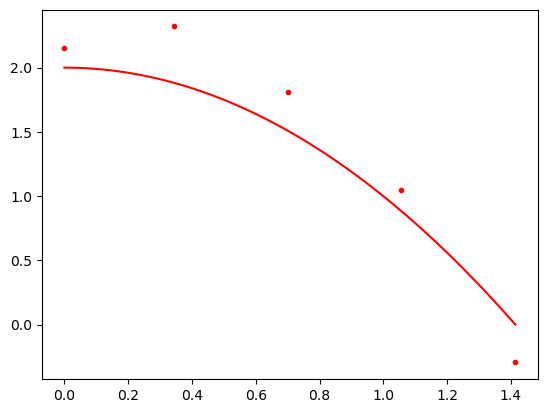

In [ ]:
#Parabilic Electron Density
rng = np.random.default_rng(seed=1245)
N = 100
exp_er = 0.2 #10
def para(x):
    return -x**2+2
x = np.linspace(0,1.414,N)
y = para(x)
# xd_indicies = [int(1*(N/100)),int(2*(N/100)),int(2.5*(N/100)),int(5*(N/100)),int(45*(N/100)),int(47*(N/100)),int(50*(N/100)),int(62*(N/100)),int(65*(N/100)),int(72*(N/100)),int(90*(N/100)),int(92*(N/100)),int(94*(N/100)),int(96*(N/100))]
xd_indicies = np.linspace(0,N-1,5).astype(int)
# xd_indicies = range(N)

# y DATA
xd = x[xd_indicies]
M = len(xd)
yd = rng.normal(loc=para(xd),scale=exp_er)

#y' data
xprime = np.linspace(0,1.414,50)
xdprime = np.array([0])
Mprime = len(xdprime)
ydprime = np.array([0])

figSRP = plt.figure()
plt.plot(x,y,'r')
plt.plot(xd,yd,'r.')
plt.show()

prior_mean_vector = np.repeat(4,N)

# Using Hao Wu's Vanilla GPR with Gradient Information

In [7]:
#Artificail observation of near 0 at edge and gradient 0 at core
artificial_obsv = GPR(xd, yd, xdprime, ydprime, y_train_noise=np.repeat(exp_er, M), y_deriv_train_noise=np.array([0.1]))

artificial_obsv.fit()
y_test, cov_test = artificial_obsv.predict(x)
std = np.sqrt(np.diag(cov_test))
y_lower = y_test - std
y_upper = y_test + std
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y_test, 'b-')
ax.fill_between(x, y_lower, y_upper, color='blue', alpha=0.5)
ax.scatter(xd, yd, color='red', marker='x')
ax.plot(x,y,'r')
fig.show()


NameError: name 'xdprime' is not defined

# Gaussian Process Regression 3
See notes, uses bayes theorum and the prediction can have many x values. Also applicable to interferometry.

      fun: 6.108471773512447
 hess_inv: array([[9.80726430e+00, 9.34797507e-04],
       [9.34797507e-04, 1.00000014e+00]])
      jac: array([ 0.00000000e+00, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 10
     njev: 11
   status: 0
  success: True
        x: array([6.95366962, 0.09401796])
best Marge Li 6.108471773512447


Not good if zero, as need to be inverted.


K [[48.35352122 46.64044415 41.8568356  34.94936187]
 [46.64044415 48.35352122 46.64044415 41.8568356 ]
 [41.8568356  46.64044415 48.35352122 46.64044415]
 [34.94936187 41.8568356  46.64044415 48.35352122]]
The Determinent of K is: 0.0
The Determinent of cov_li is: 0.010240000000000008
The Determinent of cov_post3 is: 0.0


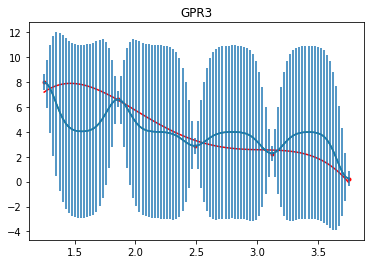

In [ ]:
##Prior
mu_prior = prior_mean_vector
#exponential square kernel
def Kernel(x1,x2,params):
    x1 = x1
    x2 = x2
    #amplitude determins how far the model can go from the mean
    amp = params[0]
    #length scale determines smoothness, how correlated the function should be at a distance
    l = params[1]
    return amp**2 * np.exp(-((x1-x2)*(x1-x2))/(2*l**2))

def KRcov_li(params,trial_exp_er):
    X1, X2 = np.meshgrid(x,x)
    #covergence matrix of Prior
    K = Kernel(X1,X2,params)
    #add a small term onto diagonal of matricies to be inverted.
    #this ensures it is positive definate and cholensky matrix can be computed
    K[np.diag_indices_from(K)] += 1e-8
    #covergence matrix of Likelyhood
    cov_li = np.diag(np.repeat(trial_exp_er,len(xd)))
    #R is a matrix that can take a potential function vector f_N and only return M values corresponding to f(x_1)...f(x_M)
    R = np.zeros((M,N))
    for i in range(M):
        R[i,xd_indicies[i]]=1
    return K, R, cov_li


def MargLi(params):
    K, R, cov_li = KRcov_li(params,exp_er)
    invertable = cov_li+R@K@R.T
    #add a small term onto diagonal of matricies to be inverted.
    #this ensures it is positive definate and cholensky matrix can be computed
    invertable[np.diag_indices_from(invertable)] += 1e-8
#     try:
#         L = np.linalg.cholesky(test_matrix)
#     except np.linalg.LinAlgError:
#         return 1.7e307
    return 0.5*np.log(chol_det(cov_li + R@K@R.T)) + 0.5*(yd.T@chol_inv(cov_li+R@K@R.T)@yd)

x0=[2.6,0.094]
results = minimize(MargLi, x0=x0)
# results = basinhopping(MargLi, x0=x0, niter=100)
print(results)
best_params = results.x
# best_params = x0
print('best Marge Li', MargLi(best_params))

#little data
# best_params = (7.4,0.7)
# print('margi LI',MargLi(*best_params,exp_er))

# print('best Params',best_params)
# print('loggli',best_margli)


def PlotBest(params,trial_exp_er):
    K, R, cov_li = KRcov_li(params,trial_exp_er)
    cov_post3 = chol_inv(R.T @ chol_inv(cov_li) @ R + chol_inv(K))
    mu_post3 = mu_prior + cov_post3 @ R.T @ chol_inv(cov_li) @ (yd - R @ mu_prior)
    error_bars3 = np.sqrt(np.diagonal(cov_post3))

    print('\n\nNot good if zero, as need to be inverted.')
    print('\n\nK',K[:4,:4])
    print('The Determinent of K is:', np.linalg.det(K))
    print('The Determinent of cov_li is:', np.linalg.det(cov_li))
    print('The Determinent of cov_post3 is:', np.linalg.det(cov_post3))

    figGPR3 = plt.figure()
    plt.title('GPR3')
    plt.plot(x,y,'r')
    plt.plot(xd,yd,'r.')
    plt.plot(x,mu_post3,'g')

    plt.errorbar(x, mu_post3, yerr=error_bars3)
    plt.show()

PlotBest(best_params, exp_er)


# GPR 3 with gradient information, via extending the responce matrix
The Idea is that I can simply put the gradient information on the end of the data vector. Then put the identity matrix on the end of the responce matrix.

In [ ]:
#adding the artificial observations, density at edge and gradient at core
yd = np.concatenate((yd,np.array([0,0])))

##Prior
mu_prior = np.concatenate((prior_mean_vector,np.zeros(2)))
#exponential square kernel
def Kernel(x,params):
    def FourIn1(A,B,C,D):
        #starts top left and gloes clockwise, A B C D
        print('4in1')
        print(A.shape,B.shape,C.shape,D.shape)
        one = np.concatenate((A,B),axis=1)
        two = np.concatenate((D,C),axis=1)
        return np.concatenate((one,two),axis = 0)

    x = np.concatenate((x,np.ones(1)))
    X1, X2 = np.meshgrid(x,x)
    #amplitude determins how far the model can go from the mean
    amp = params[0]
    #length scale determines smoothness, how correlated the function should be at a distance
    l = params[1]
    K = amp**2 * np.exp(-((X1-X2)*(X1-X2))/(2*l**2))
    Kprpr = np.array([[-amp/l**2]]) #only for specific case where grad info is at x=0
    KprOne = np.array([[amp*np.exp(1/2*l**2)* -1/l**2]])
    Kpr = np.array([amp*np.exp(-x**2/2*l**2) * -1/l**2 * (-x)])
    K_full = FourIn1(K,Kpr.T,Kprpr,-Kpr)
    return K_full

def KRcov_li(params,trial_exp_er):
    #covergence matrix of Prior
    K = Kernel(x,params)
    #add a small term onto diagonal of matricies to be inverted.
    #this ensures it is positive definate and cholensky matrix can be computed
    K[np.diag_indices_from(K)] += 1e-8
    #covergence matrix of Likelyhood
    cov_li = np.diag(np.concatenate((np.repeat(trial_exp_er,len(xd)),np.array([0.001,0.001]))))
    #R is a matrix that can take a potential function vector f_N and only return M values corresponding to f(x_1)...f(x_M)
    R = np.zeros((M+2,N+2))
    for i in range(M):
        R[i,xd_indicies[i]]=1
    #added for new artificial observations
    R[-1,-1]=1
    R[-2,-2]=1
    return K, R, cov_li

def MargLi(params):
    K, R, cov_li = KRcov_li(params,exp_er)
    invertable = cov_li+R@K@R.T
    #add a small term onto diagonal of matricies to be inverted.
    #this ensures it is positive definate and cholensky matrix can be computed
    invertable[np.diag_indices_from(invertable)] += 1e-8
#     try:
#         L = np.linalg.cholesky(test_matrix)
#     except np.linalg.LinAlgError:
#         return 1.7e307

    return np.log(chol_det(invertable)) + (yd.T@chol_inv(invertable)@yd)

x0=[2,0.1]
results = minimize(MargLi, x0=x0)
# results = basinhopping(MargLi, x0=x0, niter=100)
# print(results)
# best_params = results.x
best_params = x0
# print('best Marge Li', MargLi(best_params))

#little data
# best_params = (7.4,0.7)
# print('margi LI',MargLi(*best_params,exp_er))

# print('best Params',best_params)
# print('loggli',best_margli)

def PlotBest(params,trial_exp_er):
    K, R, cov_li = KRcov_li(params,trial_exp_er)
    cov_post3 = chol_inv(R.T @ chol_inv(cov_li) @ R + chol_inv(K))
    mu_post3 = mu_prior + cov_post3 @ R.T @ chol_inv(cov_li) @ (yd - R @ mu_prior)
    error_bars3 = np.sqrt(np.diagonal(cov_post3))

    print('\n\nNot good if zero, as need to be inverted.')
    print('\n\nK',K[:4,:4])
    print('The Determinent of K is:', np.linalg.det(K))
    print('The Determinent of cov_li is:', np.linalg.det(cov_li))
    print('The Determinent of cov_post3 is:', np.linalg.det(cov_post3))

    figGPR3 = plt.figure()
    plt.title('GPR3')
    plt.plot(x,y,'r')
    plt.plot(xd,yd,'r.')
    plt.plot(x,mu_post3,'g')

    plt.errorbar(x, mu_post3, yerr=error_bars3)
    plt.show()

PlotBest(best_params, exp_er)

4in1
(101, 101) (101, 1) (1, 1) (1, 101)


LinAlgError: Matrix is not positive definite

# Optuna Optimization

In [ ]:
import optuna

def objective(trial):
    amp = trial.suggest_float('amp', 0, 20)
    l = trial.suggest_float('l', 0, 4)
    params = [amp,l]
    return MargLi(params)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)

study.best_params

In [ ]:
results

      fun: 4.71578696020939
 hess_inv: array([[1.60813141e-05, 1.44127841e-06],
       [1.44127841e-06, 1.29320615e-07]])
      jac: array([1.75833702e-05, 4.41074371e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 222
      nit: 17
     njev: 70
   status: 2
  success: False
        x: array([7.35781514, 0.73227267])

# Gaussian Process 1 Including Gradient Information From Cholskey Method

should be equilivant to hao wu's method but my version gets numerical errors

In [ ]:
#KERNEL: exponential square kernel
def Kernel(x1,x2,params):
    amp = params[0]
    'How far should be between x1 and x2 for f(x1) to be uncorrelated with f(x2)'
    l = params[1]
    return amp**2 * np.exp(-((x1-x2)*(x1-x2))/(2*l**2))

def KernelPrime(x1,x2,params):
    amp = params[0]
    'How far should be between x1 and x2 for f(x1) to be uncorrelated with f(x2)'
    l = params[1]
    return Kernel(x1,x2,params) * 1/l**2 * x1-x2


def KernelPrimePrime(x1,x2,params):
    amp = params[0]
    'How far should be between x1 and x2 for f(x1) to be uncorrelated with f(x2)'
    l = params[1]
    return KernelPrime(x1,x2,params) * (x1-x2)/l**2 - 1/l**2 * amp * Kernel(x1, x2, params)

#K box **, top left, top right, bottom right
Xprprstst1, Xprprstst2 = np.meshgrid(xprime, xprime)
Xprststj1, Xprststj2 = np.meshgrid(x, xprime)
Xstst1, Xstst2 = np.meshgrid(x,x)
Xprststi1, Xprststi2 = np.meshgrid(xprime, x)

#K box *
Xprprst1, Xprprst2 = np.meshgrid(xdprime,xprime)
Xprstj1, Xprstj2 = np.meshgrid(xd,xprime)
Xst1, Xst2 = np.meshgrid(xd,x)
Xprsti1, Xprsti2 = np.meshgrid(xdprime,x)
print(Xprstj1.shape, Xprstj2.shape)

# K box
Xprpr1, Xprpr2 = np.meshgrid(xdprime, xdprime)
Xprj1, Xprj2 = np.meshgrid(xd, xdprime)
X1, X2 = X1, X2 = np.meshgrid(xd,xd)
Xpri1, Xpri2 = np.meshgrid(xdprime, xd)


# X1, X2 = np.meshgrid(xd,xd)
# Xstst1, Xstst2 = np.meshgrid(x,x)
# Xst1, Xst2 = np.meshgrid(x,xd)

#optimising kernel paramaters via marginal likelyhood
# def MargLi(params):
#     K, R, cov_li = KRcov_li(params,exp_er)
#     invertable = cov_li+R@K@R.T
#     #add a small term onto diagonal of matricies to be inverted.
#     #this ensures it is positive definate and cholensky matrix can be computed
#     invertable[np.diag_indices_from(invertable)] += 1e-8
#     return 0.5*np.log(chol_det(cov_li + R@K@R.T)) + 0.5*(yd.T@chol_inv(cov_li+R@K@R.T)@yd)

x0=[3.15,0.096]
# results = minimize(MargLi, x0=x0)
# results = basinhopping(MargLi, x0=x0, niter=200)
# print('\n\nRESULTS',results)
# best_params = results.x
best_params = x0

# print('\n\nMargLi',MargLi(best_params))

#clockwise starting from top left
Kboxstst1 = KernelPrimePrime(Xprprstst1,Xprprstst2,best_params)
Kboxstst2 = KernelPrime(Xprststj1,Xprststj2,best_params)
Kboxstst3 = Kernel(Xstst1,Xstst2,best_params)
Kboxstst4 = KernelPrime(Xprststi1,Xprststi2,best_params)

Kboxst1 = KernelPrimePrime(Xprprst1,Xprprst2,best_params)
Kboxst2 = KernelPrime(Xprstj1,Xprstj2,best_params)
Kboxst3 = Kernel(Xst1,Xst2,best_params)
Kboxst4 = KernelPrime(Xprsti1,Xprsti2,best_params)

Kbox1 = KernelPrimePrime(Xprpr1,Xprpr2,best_params)
Kbox2 = KernelPrime(Xprj1,Xprj2,best_params)
Kbox3 = Kernel(X1,X2,best_params)
Kbox4 = KernelPrime(Xpri1,Xpri2,best_params)

def FourIn1(A,B,C,D):
    #starts top left and gloes clockwise, A B C D
    print('4in1')
    print(A.shape,B.shape,C.shape,D.shape)
    one = np.concatenate((A,B),axis=1)
    two = np.concatenate((D,C),axis=1)
    return np.concatenate((one,two),axis = 0)

Kboxstst = FourIn1(Kboxstst1,Kboxstst2,Kboxstst3,Kboxstst4)
Kboxst = FourIn1(Kboxst1,Kboxst2,Kboxst3,Kboxst4)
Kbox = FourIn1(Kbox1,Kbox2,Kbox3,Kbox4)

#add a small term onto diagonal of matricies to be inverted.
#this ensures it is positive definate and cholensky matrix can be computed
Kbox[np.diag_indices_from(Kbox)] += 1e-8

##Data Dist, has prior in it
mu_D = np.array([0 for i in range(M+Mprime)])#prior_mean_vector
exp_er_prime = 0.0001
cov_D = Kbox + np.diag(np.concatenate((np.repeat(exp_er,M), np.repeat(exp_er_prime,Mprime))))
cov_D[np.diag_indices_from(cov_D)] += 1e-8

print('Probably not good if 0. cov_D definetly cannot be 0 as it is inverted.')
# print('The Determinent of K is:', chol_det(K))
# print('The Determinent of Kst is:', chol_det(Kst))
# print('The Determinent of Kstst is:', chol_det(Kstst))
# print('The Determinent of cov_D is:', chol_det(cov_D))
##Predictions dist
mu_yst = np.repeat(0,N)
cov_yst = Kstst



cov_post = Kboxstst - Kboxst.T @ chol_inv(cov_D) @ Kboxst
mu_post = Kboxst.T @ chol_inv(cov_D) @ np.contatenate((ydprime,yd))

error_bars = np.diagonal(cov_post)

mu_post_yst = mu_post[Mprime:]
error_bars_yst = np.diagonal(cov_post)[Mprime:]


figGPR1 = plt.figure()
plt.title('GPR1')
plt.plot(x,y,'r')
plt.plot(xd,yd,'r.')
plt.plot(x,mu_post_yst,'g')
plt.errorbar(x, mu_post_yst, yerr=error_bars_yst)
plt.show()

NameError: name 'xprime' is not defined

In [ ]:
import optuna

def objective(trial):
    amp = trial.suggest_float('amp', 0, 22)
    l = trial.suggest_float('l', 0, 4)
    params = [amp,l]
    return MargLi(params)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)

study.best_params

## Before Kernel Optimisation

The performance is highly unstable. The errors vary from wildly large to extreamly tiny. The mean vector can look like gaussian noise or closely matching the profile. Also if the space between data points to too small the kernel covariance matric seems to have a determinent of 0 and thus no inverse. Some kernel parameters also cause this to hapen. It can happen in the other matracies aswell. This can cause errors in the code if the matrix is to be inveresed. It also causes the error bars to swing from almost infinity to almost 0.

## After Kernel Optimisation

GP1 works extreamly well after kernel optimisation. Knowing exactly how the kernel parameters influence the graph can help dramatically for selecting a prior with optuna, or initial guesses for scipy.optimise(). The amp, sets how easy it is for the posterior mean to get far from the prior mean. The higher this is the weaker the prior is. The length scale l, sets how correlated two points are. For two points with one specific x distance apart, they are said to be more correlated is l is large and less correlated if l is small. We use how correlated they are in x as exactly how correlated they are in y.  

# Gaussian Process Regression 2
See notes, uses bayes theorum but must have the same x position for data and predictions.

# Ignore this one for now

(5,)


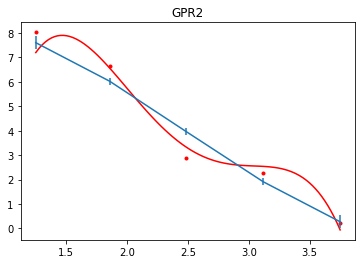

In [ ]:
#exponential square kernel
def kernel(x1,x2):
    a = 10
    b = 10
    return a * np.exp(-((x1-x2)*(x1-x2))/b)
X1, X2 = np.meshgrid(xd,xd)
prior_cov = kernel(X1,X2) #np.diag(np.repeat(exp_er,len(x)))#
likelyhood_cov = np.diag(np.repeat(exp_er,len(xd)))
#Now we make the gaussian process distribution for the likelyhood
likelyhood = mnorm(mean=yd, cov=likelyhood_cov)
prior = mnorm(mean=np.repeat(0,len(xd)),cov=prior_cov, allow_singular=True)

#posterior_mean = inv(inv(prior_cov)+inv(likelyhood_cov)) @ (inv(prior_cov)@likelyhood.mean+inv(likelyhood_cov)@prior.mean)
posterior_mean = prior_cov @ inv(prior_cov + likelyhood_cov) @ likelyhood.mean  +  likelyhood_cov @ inv(prior_cov + likelyhood_cov) @ prior.mean
posterior_cov = prior_cov @ inv(prior_cov + likelyhood_cov) @ likelyhood_cov
error_bars2 = np.diagonal(posterior_cov)

print(np.shape(posterior_mean))
figGPR2 = plt.figure()
plt.title('GPR2')
plt.plot(x,y,'r')
plt.plot(xd,yd,'r.')
# plt.plot(x,posterior_mean,'g')
plt.errorbar(xd,posterior_mean, yerr=error_bars2)
plt.show()